# Análisis Detallado por Provincia de Viviendas en Andalucía

Este cuaderno se dedica a un análisis exhaustivo de los datos de viviendas en Andalucía, desglosado por cada una de sus 8 provincias: Almería, Cádiz, Córdoba, Granada, Huelva, Jaén, Málaga y Sevilla. El objetivo es identificar características y patrones específicos del mercado inmobiliario en cada provincia.

**Pasos del Análisis por Provincia:**
1.  Filtrar el DataFrame por la provincia.
2.  Calcular y mostrar estadísticas descriptivas para `precio`, `superficie`, `precio_m2`, `habitaciones` y `baños`.
3.  Generar histogramas y boxplots para estas variables numéricas.
4.  Mostrar la distribución de `tipo_propiedad` (countplot).
5.  Visualizar la relación entre `tipo_propiedad` y `precio`/`precio_m2` (boxplots).
6.  Crear un scatter plot geoespacial (`latitud` vs `longitud`) de las propiedades, coloreado por `precio` o `precio_m2`.
7.  Generar un KDE plot o hexbin plot para visualizar la densidad de propiedades y/o precios medios.

In [6]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import os

# Es importante tener instaladas estas librerías:
# pip install pandas numpy matplotlib seaborn scipy

In [7]:
# Configuración de visualizaciones
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formato para floats

# Definir rutas de archivos
data_dir = '../data/clean' # Ajusta esta ruta si es necesario
file_name = 'andalucia_clean_20250516.csv'
file_path = os.path.join(data_dir, file_name)

# Cargar el dataset
try:
    df = pd.read_csv(file_path)
    print(f"Dataset cargado exitosamente desde: {file_path}")
    print(f"Dimensiones del dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo en {file_path}")
    print(f"Asegúrate de que la ruta '{data_dir}' y el archivo '{file_name}' son correctos.")
    df = pd.DataFrame() # DataFrame vacío para evitar errores

# Ingeniería de la Característica 'Provincia' (adaptado de analisis_visualizacion v2.ipynb)
if not df.empty:
    provincias_andalucia = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla']

    def extraer_provincia(ubicacion_str):
        if not isinstance(ubicacion_str, str):
            return 'Desconocida'
        
        ubicacion_lower = ubicacion_str.lower()
        
        map_terminos_provincia = {
            'almería': 'Almería', 'almeria': 'Almería', 'roquetas de mar': 'Almería', 'el ejido': 'Almería', 'vera': 'Almería', 'níjar': 'Almería', 'adra': 'Almería', 'vícar': 'Almería', 'huercal-overa': 'Almería', 'huércal-overa': 'Almería', 'berja': 'Almería', 'albox': 'Almería', 'pulpí': 'Almería', 'cuevas del almanzora': 'Almería',
            'cádiz': 'Cádiz', 'cadiz': 'Cádiz', 'jerez': 'Cádiz', 'jerez de la frontera': 'Cádiz', 'algeciras': 'Cádiz', 'san fernando': 'Cádiz', 'el puerto de santa maría': 'Cádiz', 'chiclana': 'Cádiz', 'chiclana de la frontera': 'Cádiz', 'sanlúcar de barrameda': 'Cádiz', 'la línea de la concepción': 'Cádiz', 'puerto real': 'Cádiz', 'arcos de la frontera': 'Cádiz', 'san roque': 'Cádiz', 'rota': 'Cádiz', 'los barrios': 'Cádiz', 'barbate': 'Cádiz', 'chipiona': 'Cádiz', 'tarifa': 'Cádiz', 'ubrique': 'Cádiz', 'conil de la frontera': 'Cádiz', 'villamartín': 'Cádiz', 'medina-sidonia': 'Cádiz',
            'córdoba': 'Córdoba', 'cordoba': 'Córdoba', 'lucena': 'Córdoba', 'puente genil': 'Córdoba', 'montilla': 'Córdoba', 'priego de córdoba': 'Córdoba', 'palma del río': 'Córdoba', 'cabra': 'Córdoba', 'baena': 'Córdoba', 'pozoblanco': 'Córdoba', 'la carlota': 'Córdoba', 'aguilar de la frontera': 'Córdoba',
            'granada': 'Granada', 'motril': 'Granada', 'almuñécar': 'Granada', 'armilla': 'Granada', 'maracena': 'Granada', 'baza': 'Granada', 'loja': 'Granada', 'las gabias': 'Granada', 'guadix': 'Granada', 'la zubia': 'Granada', 'albolote': 'Granada', 'atarfe': 'Granada', 'santa fe': 'Granada', 'ogíjares': 'Granada', 'salobreña': 'Granada',
            'huelva': 'Huelva', 'lepe': 'Huelva', 'almonte': 'Huelva', 'isla cristina': 'Huelva', 'ayamonte': 'Huelva', 'moguer': 'Huelva', 'cartaya': 'Huelva', 'punta umbría': 'Huelva', 'aljaraque': 'Huelva', 'valverde del camino': 'Huelva', 'gibraleón': 'Huelva', 'palos de la frontera': 'Huelva',
            'jaén': 'Jaén', 'jaen': 'Jaén', 'linares': 'Jaén', 'ándujar': 'Jaén', 'úbeda': 'Jaén', 'martos': 'Jaén', 'alcalá la real': 'Jaén', 'bailén': 'Jaén', 'baeza': 'Jaén', 'la carolina': 'Jaén', 'torredonjimeno': 'Jaén', 'torredelcampo': 'Jaén', 'jódar': 'Jaén', 'mancha real': 'Jaén', 'villacarrillo': 'Jaén', 'alcaudete': 'Jaén',
            'málaga': 'Málaga', 'malaga': 'Málaga', 'marbella': 'Málaga', 'fuengirola': 'Málaga', 'vélez-málaga': 'Málaga', 'torremolinos': 'Málaga', 'benalmádena': 'Málaga', 'estepona': 'Málaga', 'mijas': 'Málaga', 'rincón de la victoria': 'Málaga', 'antequera': 'Málaga', 'ronda': 'Málaga', 'alhaurín de la torre': 'Málaga', 'alhaurín el grande': 'Málaga', 'nerja': 'Málaga', 'torrox': 'Málaga', 'manilva': 'Málaga', 'coín': 'Málaga', 'cártama': 'Málaga',
            'sevilla': 'Sevilla', 'dos hermanas': 'Sevilla', 'alcalá de guadaíra': 'Sevilla', 'alcala de guadaira': 'Sevilla', 'utrera': 'Sevilla', 'mairena del aljarafe': 'Sevilla', 'écija': 'Sevilla', 'ecija': 'Sevilla', 'la rinconada': 'Sevilla', 'los palacios y villafranca': 'Sevilla', 'coria del río': 'Sevilla', 'carmona': 'Sevilla', 'morón de la frontera': 'Sevilla', 'lebrija': 'Sevilla', 'camas': 'Sevilla', 'tomares': 'Sevilla', 'mairena del alcor': 'Sevilla', 'san juan de aznalfarache': 'Sevilla', 'bormujos': 'Sevilla', 'marchena': 'Sevilla', 'arahal': 'Sevilla', 'el viso del alcor': 'Sevilla', 'osuna': 'Sevilla', 'castilleja de la cuesta': 'Sevilla', 'las cabezas de san juan': 'Sevilla', 'pilas': 'Sevilla'
        }
        
        for prov_keyword in provincias_andalucia: # Check for direct province name first
            if prov_keyword.lower() in ubicacion_lower:
                return prov_keyword
        
        for termino, provincia_map in map_terminos_provincia.items():
            if termino in ubicacion_lower: # Check for city/term
                return provincia_map
        
        return 'Desconocida'

    if 'ubicacion' in df.columns:
        df['provincia'] = df['ubicacion'].apply(extraer_provincia)
        print("\\nConteo de propiedades por provincia extraída (incluyendo 'Desconocida'):")
        print(df['provincia'].value_counts())
        
        num_desconocidas = df[df['provincia'] == 'Desconocida'].shape[0]
        if num_desconocidas > 0:
            print(f"\\nAdvertencia: {num_desconocidas} propiedades no pudieron ser asignadas a una provincia.")
            # print("Ejemplos de 'ubicacion' no mapeadas:")
            # display(df[df['provincia'] == 'Desconocida']['ubicacion'].value_counts().head())
    else:
        print("La columna 'ubicacion' no existe, no se puede extraer la provincia.")
        df['provincia'] = 'No disponible' # Columna placeholder

    # Mostrar primeras filas e información básica si el df no está vacío
    if not df.empty:
        print("\\nPrimeras 5 filas del dataset (con 'provincia' si se generó):")
        display(df.head())
        print("\\nInformación general del DataFrame:")
        df.info()
    else:
        print("El DataFrame está vacío.")

else:
    print("El DataFrame está vacío. No se pueden realizar análisis.")

# Lista de provincias para iterar
provincias_lista = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla']
numerical_cols_analysis = ['precio', 'superficie', 'precio_m2', 'habitaciones', 'baños']

Dataset cargado exitosamente desde: ../data/clean\andalucia_clean_20250516.csv
Dimensiones del dataset: (24107, 10)
\nConteo de propiedades por provincia extraída (incluyendo 'Desconocida'):
provincia
Desconocida    21747
Huelva           379
Cádiz            371
Sevilla          358
Córdoba          346
Málaga           338
Granada          282
Almería          221
Jaén              65
Name: count, dtype: int64
\nAdvertencia: 21747 propiedades no pudieron ser asignadas a una provincia.
\nPrimeras 5 filas del dataset (con 'provincia' si se generó):


precio tipo_propiedad  superficie  habitaciones  baños  latitud  longitud  \
0  5800.00     casa_rural      168.00             4      1    37.12     -2.54   
1  9000.00         chalet       60.00             2      1    37.35     -2.30   
2  9500.00         chalet      115.00             3      1    37.35     -2.30   
3  9900.00         chalet       81.00             3      2    37.04     -2.74   
4 10000.00           piso       45.00             2      1    36.84     -2.48   

              ubicacion  precio_m2  densidad_habitaciones    provincia  
0      el almendral s/n      34.52                   0.02  Desconocida  
1     calle San Antonio     150.00                   0.03  Desconocida  
2         Olula del Río      82.61                   0.03  Desconocida  
3       calle Lucero, 3     122.22                   0.04  Desconocida  
4  calle Juan Goytisolo     222.22                   0.04  Desconocida

\nInformación general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24107 entries, 0 to 24106
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   precio                 24107 non-null  float64
 1   tipo_propiedad         24107 non-null  object 
 2   superficie             24107 non-null  float64
 3   habitaciones           24107 non-null  int64  
 4   baños                  24107 non-null  int64  
 5   latitud                24107 non-null  float64
 6   longitud               24107 non-null  float64
 7   ubicacion              24107 non-null  object 
 8   precio_m2              24107 non-null  float64
 9   densidad_habitaciones  24107 non-null  float64
 10  provincia              24107 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 2.0+ MB


## Análisis Específico para la Provincia de Almería

In [8]:
# Filtrar DataFrame y Estadísticas Descriptivas para Almería
if not df.empty and 'provincia' in df.columns:
    df_almeria = df[df['provincia'] == 'Almería'].copy()
    if df_almeria.empty:
        print(f"No hay datos disponibles para la provincia de Almería.")
    else:
        print(f"Análisis para la provincia de Almería")
        print(f"Número de propiedades en Almería: {len(df_almeria)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Almería) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_almeria.columns]
        if cols_to_describe:
            display(df_almeria[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Almería.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Almería
Número de propiedades en Almería: 221
\n--- 1. Estadísticas Descriptivas (Almería) ---


precio  superficie  precio_m2  habitaciones  baños
count     221.00      221.00     221.00        221.00 221.00
mean   124244.79      133.14     842.00          2.98   1.52
std    255007.63      146.09     719.89          1.62   1.33
min     20000.00       24.00     100.00          0.00   0.00
25%     50000.00       77.00     444.44          2.00   1.00
50%     60000.00       95.00     642.86          3.00   1.00
75%     85000.00      136.00     967.21          3.00   2.00
max   2000000.00     1801.00    6535.95         17.00  17.00

\n--- 2. Distribuciones de Variables Numéricas (Almería) ---


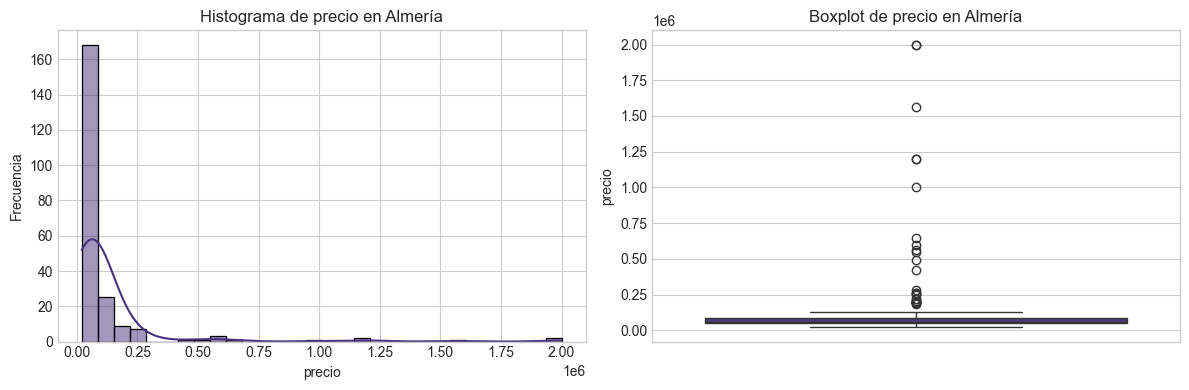

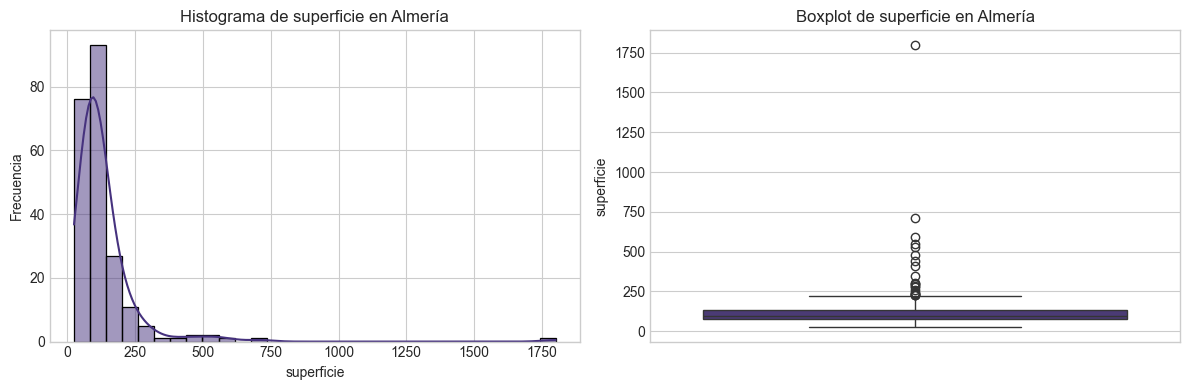

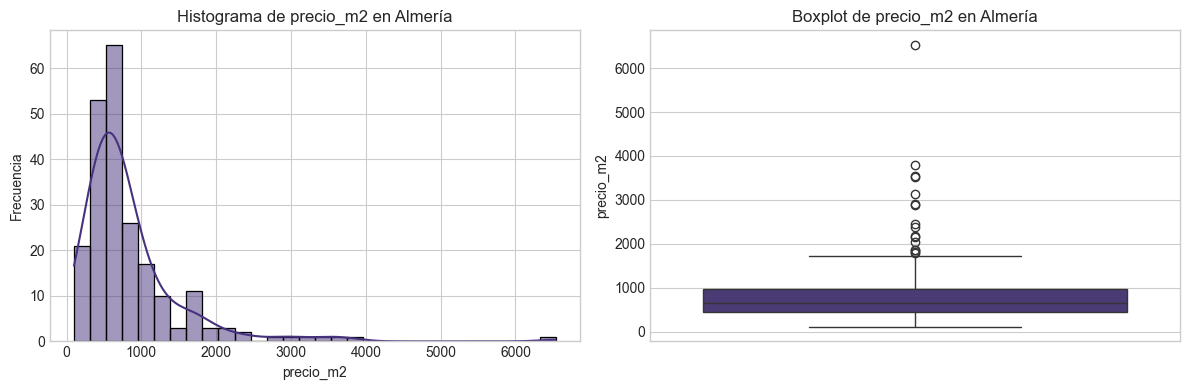

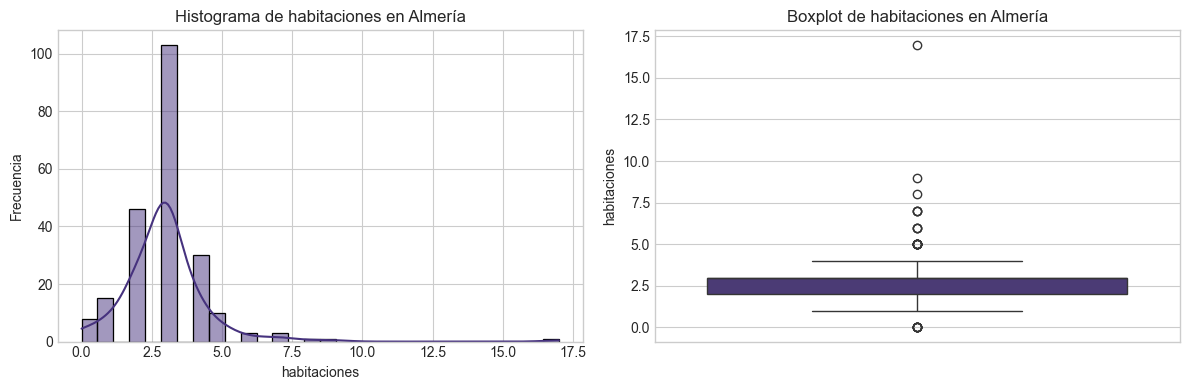

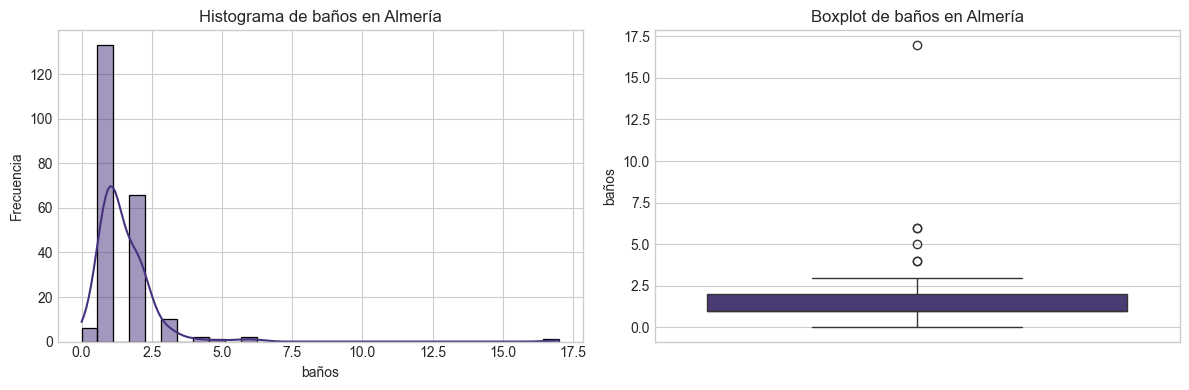

In [9]:
# Histogramas y Boxplots para Almería
if not df_almeria.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Almería) ---")
    for col in cols_to_describe: # Usa cols_to_describe definidas en la celda anterior
        if col in df_almeria.columns and df_almeria[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_almeria[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Almería')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_almeria[col].dropna())
            plt.title(f'Boxplot de {col} en Almería')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Almería.")

\n--- 3. Distribución de Tipo de Propiedad (Almería) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\1828660005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_almeria, y='tipo_propiedad', order=df_almeria['tipo_propiedad'].value_counts().index, palette='viridis')


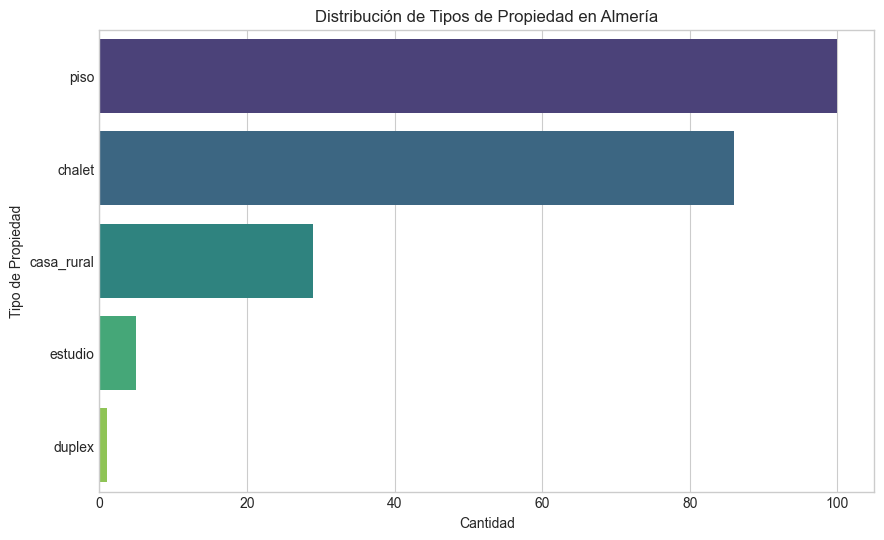

tipo_propiedad
piso         45.25
chalet       38.91
casa_rural   13.12
estudio       2.26
duplex        0.45
Name: proportion, dtype: float64


In [10]:
# Distribución de Tipo de Propiedad en Almería
if not df_almeria.empty and 'tipo_propiedad' in df_almeria.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Almería) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_almeria, y='tipo_propiedad', order=df_almeria['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Almería')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_almeria['tipo_propiedad'].value_counts(normalize=True) * 100)

\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Almería) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\1968810750.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_almeria, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


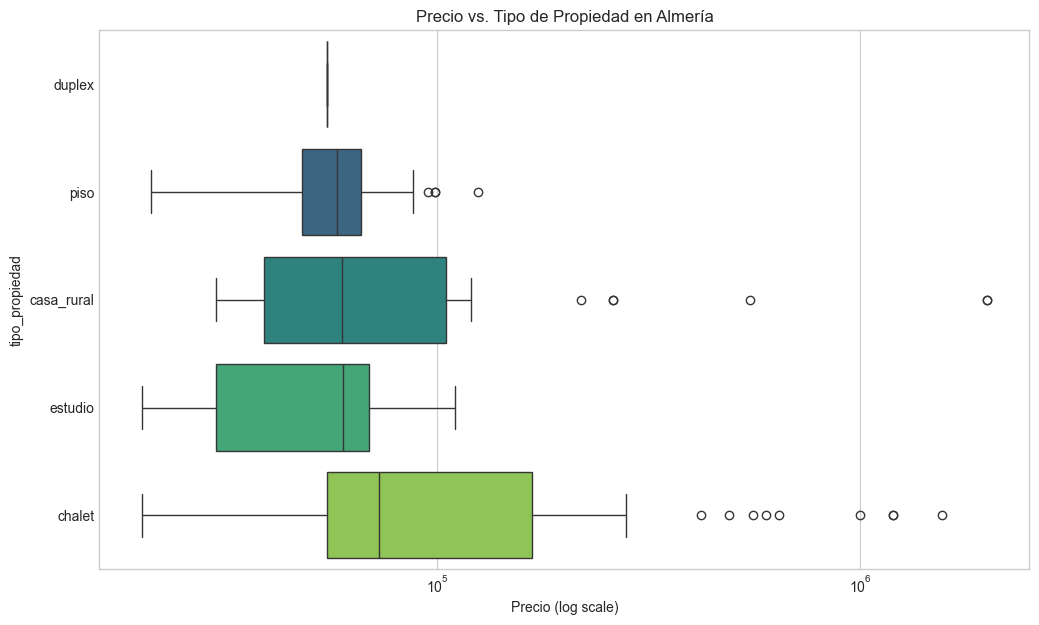

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\1968810750.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_almeria, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


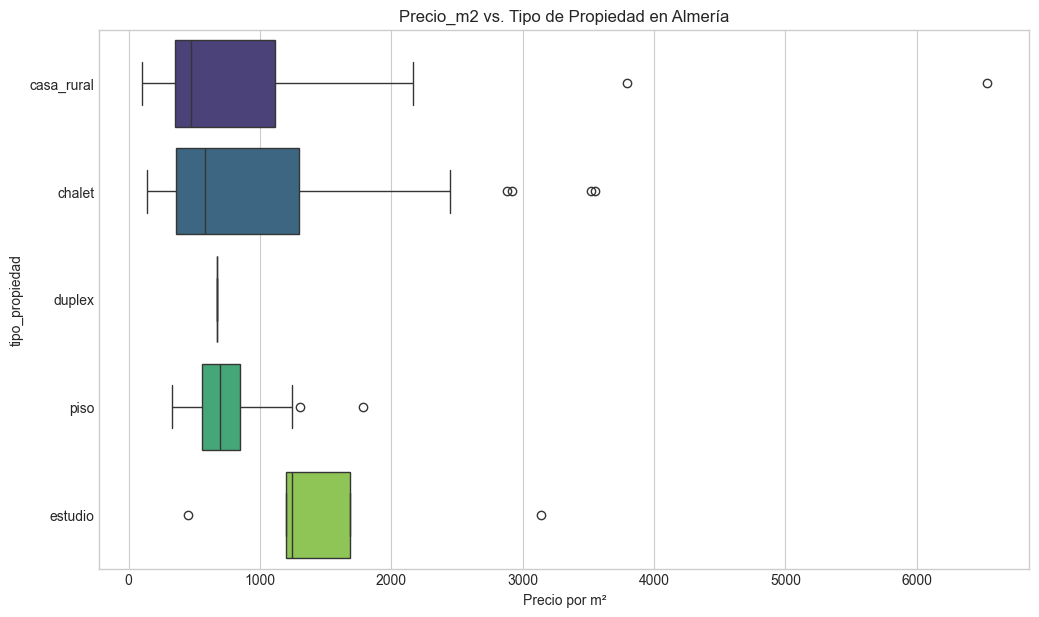

In [11]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Almería
if not df_almeria.empty and 'tipo_propiedad' in df_almeria.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Almería) ---")
    if 'precio' in df_almeria.columns and df_almeria['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_almeria.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_almeria, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Almería')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")


    if 'precio_m2' in df_almeria.columns and df_almeria['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_almeria.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_almeria, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Almería')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Almería) ---


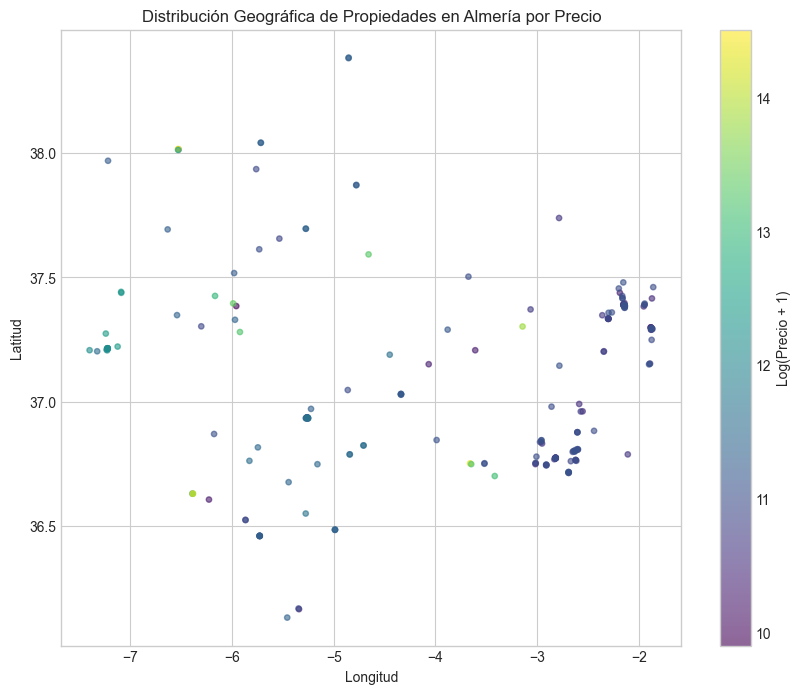

In [12]:
# Distribución Geoespacial de Propiedades en Almería
if not df_almeria.empty and 'latitud' in df_almeria.columns and 'longitud' in df_almeria.columns:
    df_geo_almeria = df_almeria.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_almeria.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Almería) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_almeria['longitud'], df_geo_almeria['latitud'], 
                              c=np.log1p(df_geo_almeria['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Almería por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Almería.")

\n--- 6. Densidad de Propiedades y Precios Medios (Almería) ---


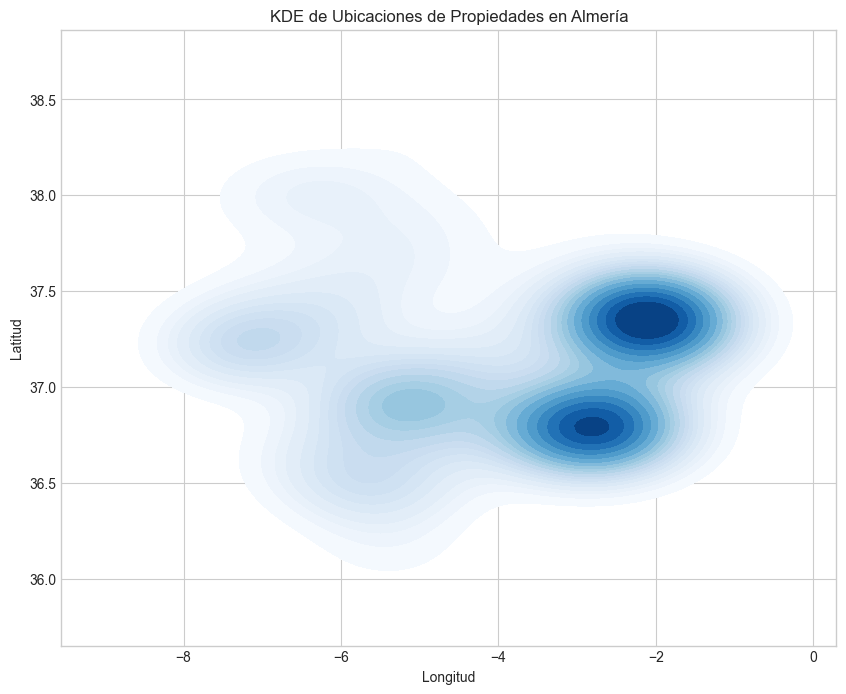

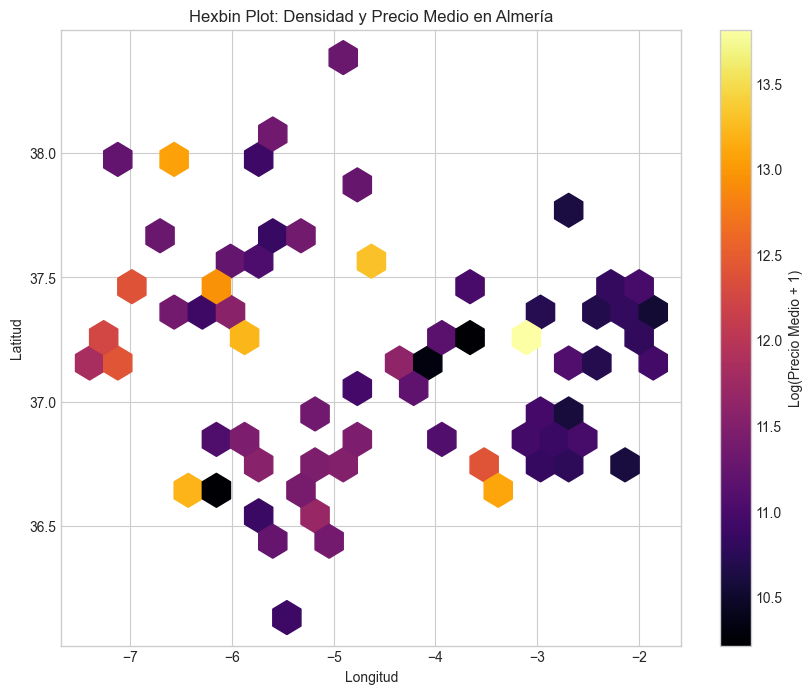

In [13]:
# Densidad de Propiedades y Precios Medios en Almería
if not df_almeria.empty and 'latitud' in df_almeria.columns and 'longitud' in df_almeria.columns:
    df_geo_density_almeria = df_almeria.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_almeria.empty and len(df_geo_density_almeria) > 3: # KDE/Hexbin needs a few points
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Almería) ---")
        # KDE plot
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_almeria['longitud'], y=df_geo_density_almeria['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Almería')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        # Hexbin plot
        df_hexbin_almeria = df_geo_density_almeria.dropna(subset=['precio'])
        if not df_hexbin_almeria.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_almeria['longitud'], df_hexbin_almeria['latitud'], C=np.log1p(df_hexbin_almeria['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Almería')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Almería después de filtrar NaNs.")
            
    elif not df_geo_density_almeria.empty and len(df_geo_density_almeria) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_almeria)}) para generar KDE/Hexbin en Almería.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Almería.")

## Análisis Específico para la Provincia de Cádiz

In [14]:
# Filtrar DataFrame y Estadísticas Descriptivas para Cádiz
if not df.empty and 'provincia' in df.columns:
    df_cadiz = df[df['provincia'] == 'Cádiz'].copy()
    if df_cadiz.empty:
        print(f"No hay datos disponibles para la provincia de Cádiz.")
    else:
        print(f"Análisis para la provincia de Cádiz")
        print(f"Número de propiedades en Cádiz: {len(df_cadiz)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Cádiz) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_cadiz.columns]
        if cols_to_describe:
            display(df_cadiz[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Cádiz.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Cádiz
Número de propiedades en Cádiz: 371
\n--- 1. Estadísticas Descriptivas (Cádiz) ---


precio  superficie  precio_m2  habitaciones  baños
count     371.00      371.00     371.00        371.00 371.00
mean   667157.81      286.00    2181.15          3.81   2.62
std   1011002.67      399.97    1671.61          2.87   2.32
min     12500.00       25.00      28.79          0.00   0.00
25%     75950.00       77.00     901.35          2.00   1.00
50%    253700.00      143.00    1622.50          3.00   2.00
75%    734500.00      300.00    3078.20          5.00   3.00
max   4999000.00     3300.00    9100.00         27.00  20.00

\n--- 2. Distribuciones de Variables Numéricas (Cádiz) ---


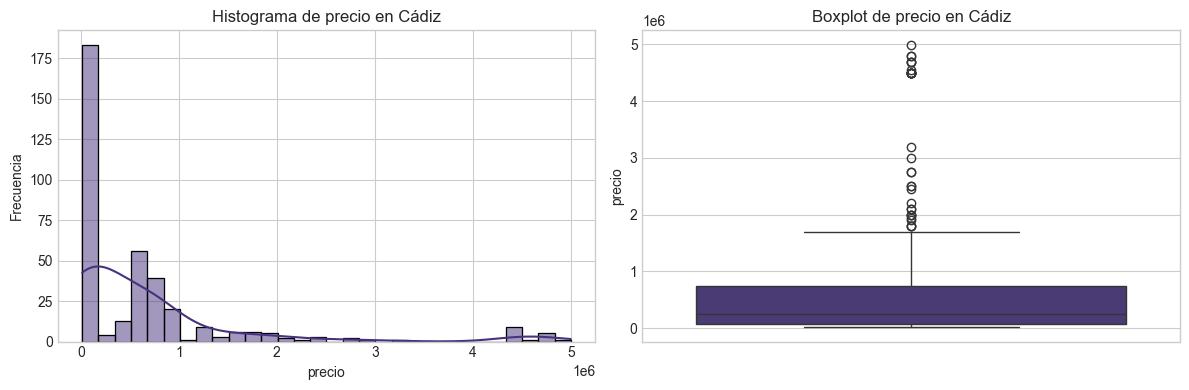

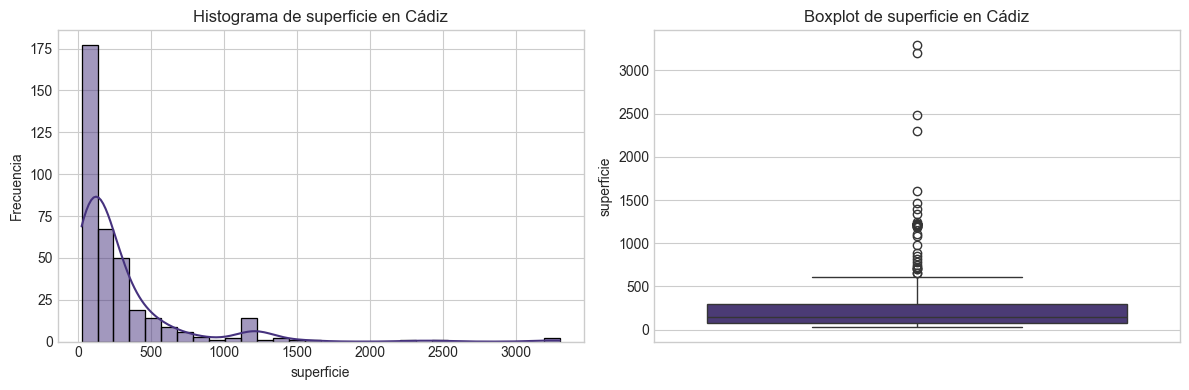

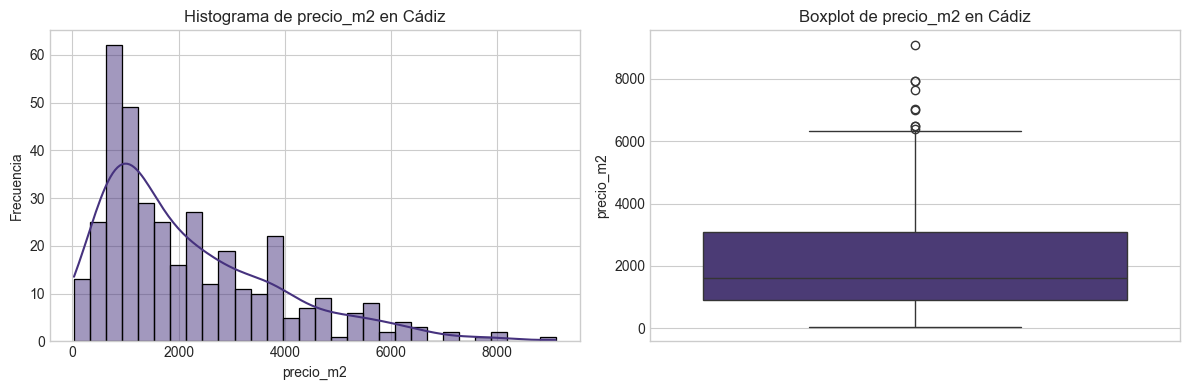

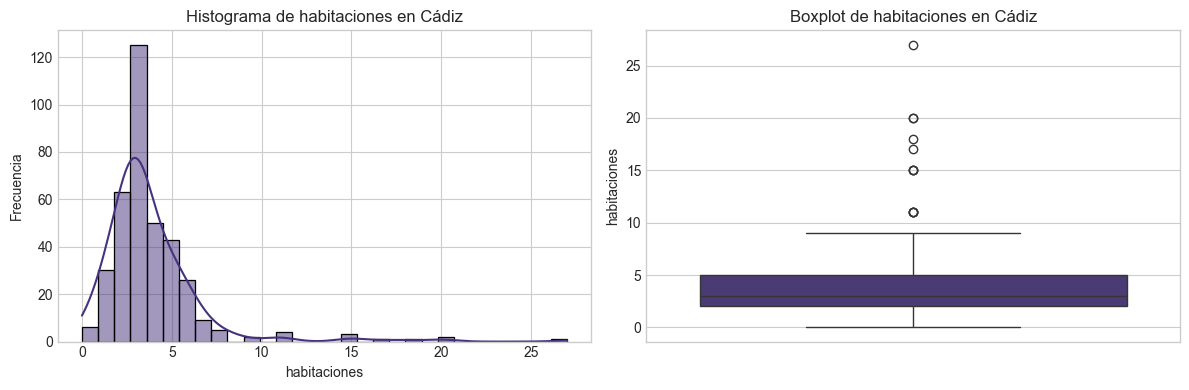

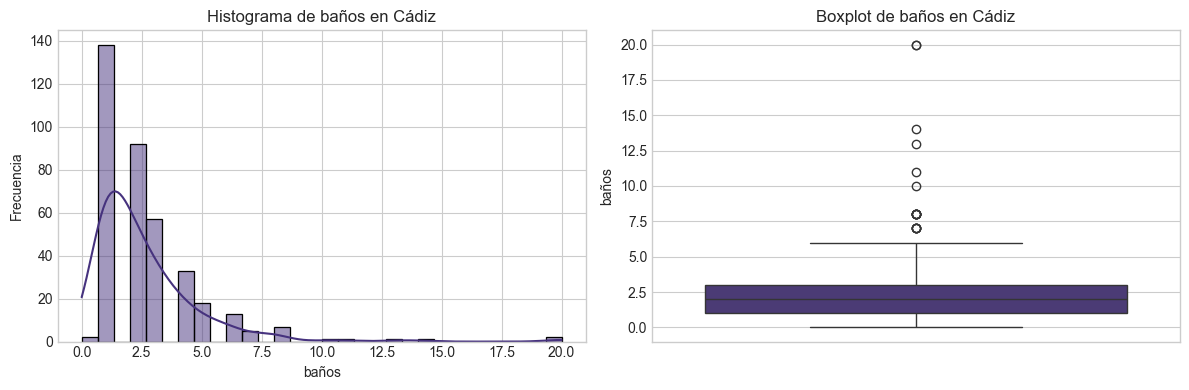

In [15]:
# Histogramas y Boxplots para Cádiz
if not df_cadiz.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Cádiz) ---")
    for col in cols_to_describe:
        if col in df_cadiz.columns and df_cadiz[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_cadiz[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Cádiz')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_cadiz[col].dropna())
            plt.title(f'Boxplot de {col} en Cádiz')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Cádiz.")

\n--- 3. Distribución de Tipo de Propiedad (Cádiz) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\2310932747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cadiz, y='tipo_propiedad', order=df_cadiz['tipo_propiedad'].value_counts().index, palette='viridis')


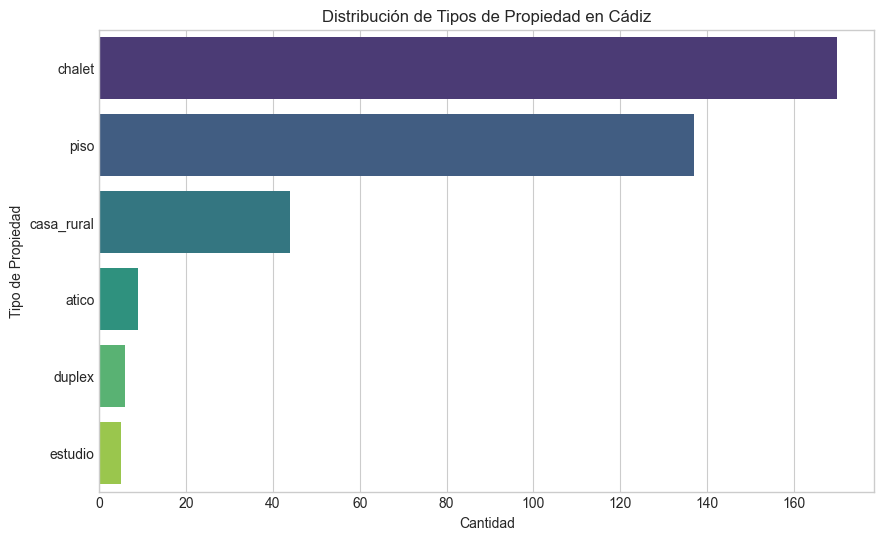

tipo_propiedad
chalet       45.82
piso         36.93
casa_rural   11.86
atico         2.43
duplex        1.62
estudio       1.35
Name: proportion, dtype: float64


In [16]:
# Distribución de Tipo de Propiedad en Cádiz
if not df_cadiz.empty and 'tipo_propiedad' in df_cadiz.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Cádiz) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cadiz, y='tipo_propiedad', order=df_cadiz['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Cádiz')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_cadiz['tipo_propiedad'].value_counts(normalize=True) * 100)

\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Cádiz) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\4040756680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cadiz, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


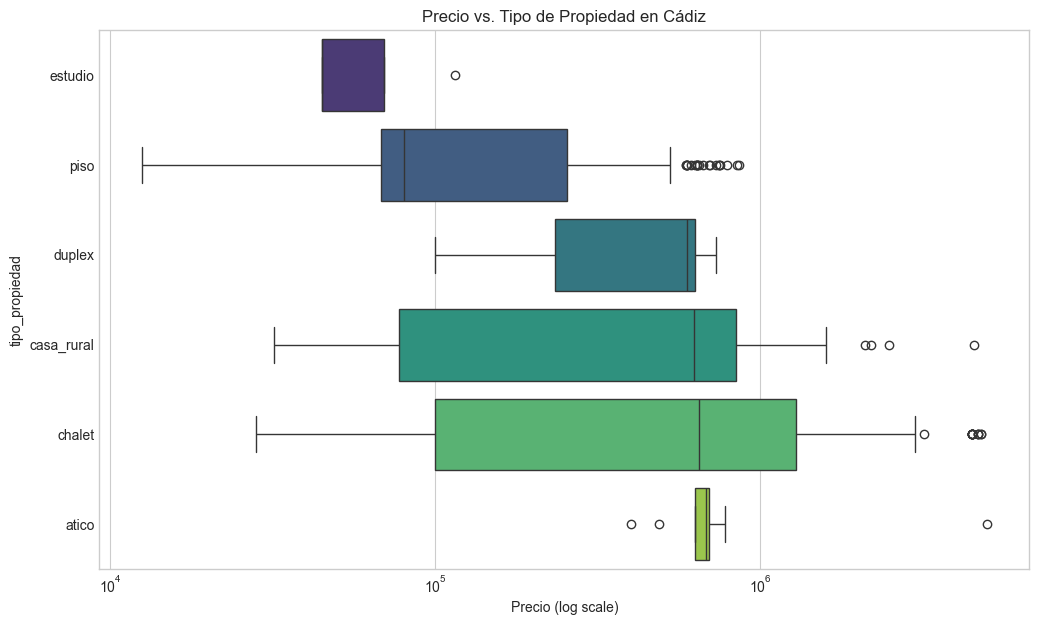

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\4040756680.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cadiz, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


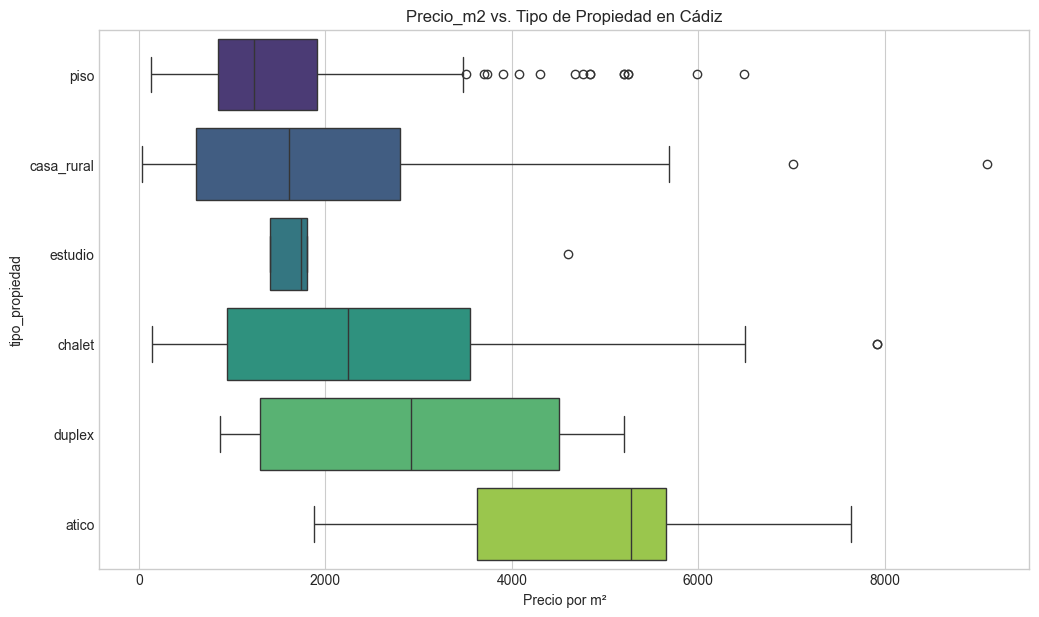

In [17]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Cádiz
if not df_cadiz.empty and 'tipo_propiedad' in df_cadiz.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Cádiz) ---")
    if 'precio' in df_cadiz.columns and df_cadiz['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_cadiz.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_cadiz, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Cádiz')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")

    if 'precio_m2' in df_cadiz.columns and df_cadiz['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_cadiz.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_cadiz, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Cádiz')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Cádiz) ---


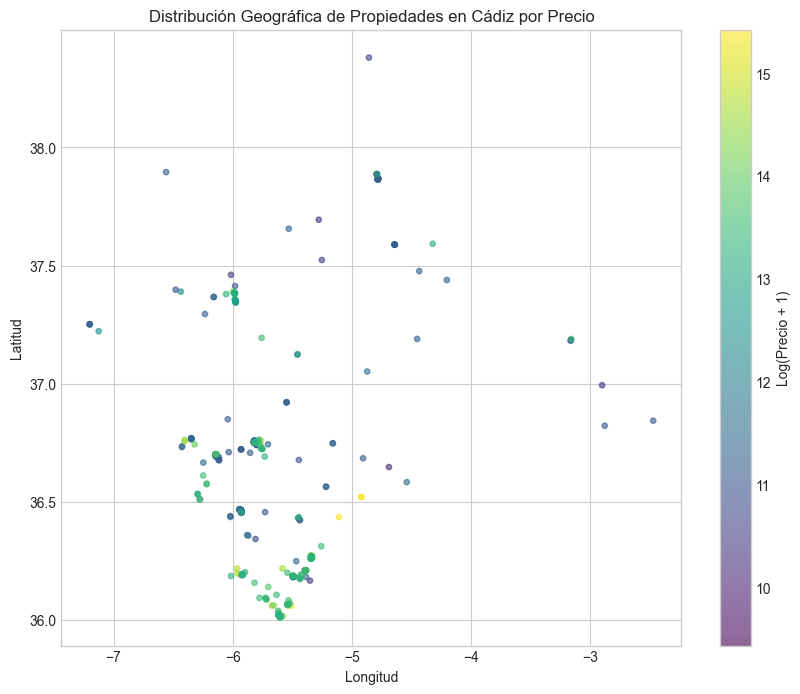

In [18]:
# Distribución Geoespacial de Propiedades en Cádiz
if not df_cadiz.empty and 'latitud' in df_cadiz.columns and 'longitud' in df_cadiz.columns:
    df_geo_cadiz = df_cadiz.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_cadiz.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Cádiz) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_cadiz['longitud'], df_geo_cadiz['latitud'], 
                              c=np.log1p(df_geo_cadiz['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Cádiz por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Cádiz.")

\n--- 6. Densidad de Propiedades y Precios Medios (Cádiz) ---


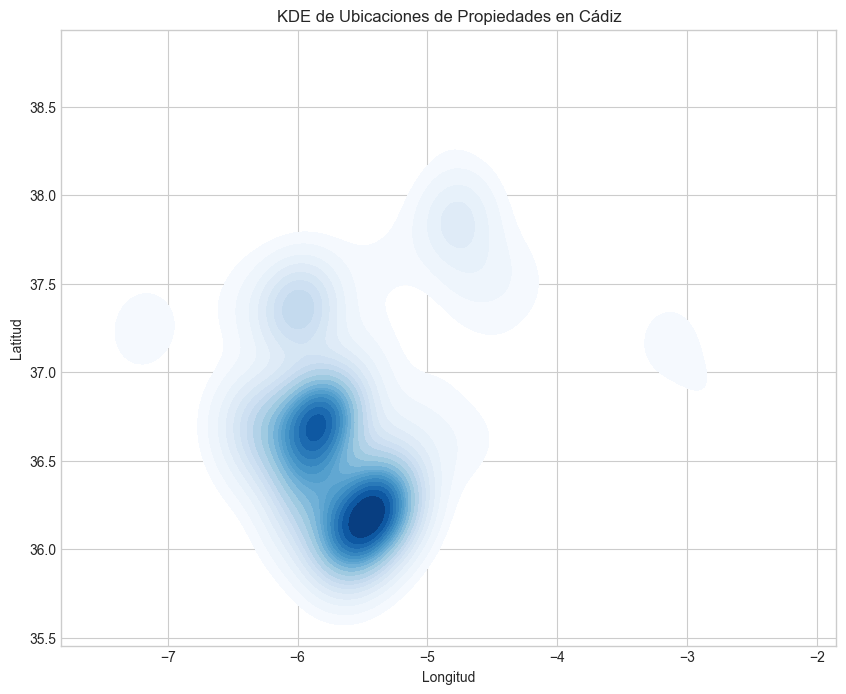

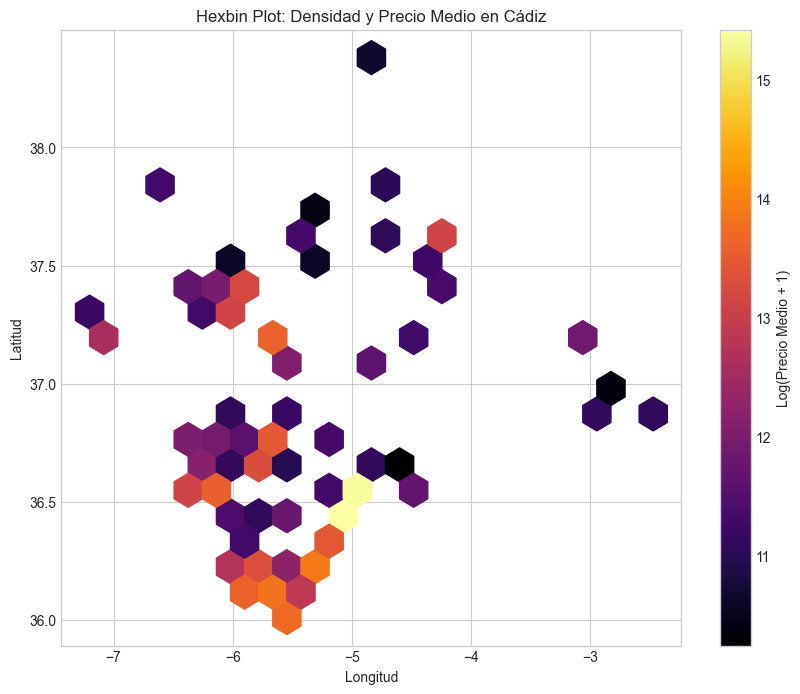

In [19]:
# Densidad de Propiedades y Precios Medios en Cádiz
if not df_cadiz.empty and 'latitud' in df_cadiz.columns and 'longitud' in df_cadiz.columns:
    df_geo_density_cadiz = df_cadiz.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_cadiz.empty and len(df_geo_density_cadiz) > 3:
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Cádiz) ---")
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_cadiz['longitud'], y=df_geo_density_cadiz['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Cádiz')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        df_hexbin_cadiz = df_geo_density_cadiz.dropna(subset=['precio'])
        if not df_hexbin_cadiz.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_cadiz['longitud'], df_hexbin_cadiz['latitud'], C=np.log1p(df_hexbin_cadiz['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Cádiz')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Cádiz después de filtrar NaNs.")
            
    elif not df_geo_density_cadiz.empty and len(df_geo_density_cadiz) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_cadiz)}) para generar KDE/Hexbin en Cádiz.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Cádiz.")

## Análisis Específico para la Provincia de Córdoba

In [20]:
# Filtrar DataFrame y Estadísticas Descriptivas para Córdoba
if not df.empty and 'provincia' in df.columns:
    df_cordoba = df[df['provincia'] == 'Córdoba'].copy()
    if df_cordoba.empty:
        print(f"No hay datos disponibles para la provincia de Córdoba.")
    else:
        print(f"Análisis para la provincia de Córdoba")
        print(f"Número de propiedades en Córdoba: {len(df_cordoba)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Córdoba) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_cordoba.columns]
        if cols_to_describe:
            display(df_cordoba[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Córdoba.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Córdoba
Número de propiedades en Córdoba: 346
\n--- 1. Estadísticas Descriptivas (Córdoba) ---


precio  superficie  precio_m2  habitaciones  baños
count     346.00      346.00     346.00        346.00 346.00
mean   154402.71      195.27     809.81          3.60   1.95
std    185026.66      258.20     535.53          1.82   1.40
min     14000.00       39.00      21.47          1.00   0.00
25%     59925.00       90.00     509.26          3.00   1.00
50%     75000.00      117.50     694.94          3.00   2.00
75%    266750.00      207.75     967.31          4.00   2.00
max   1800000.00     3400.00    6000.00         21.00  11.00

\n--- 2. Distribuciones de Variables Numéricas (Córdoba) ---


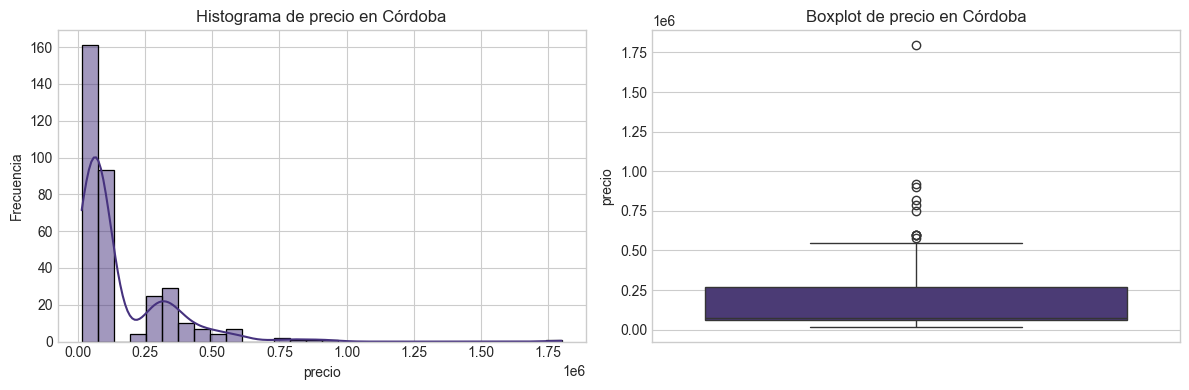

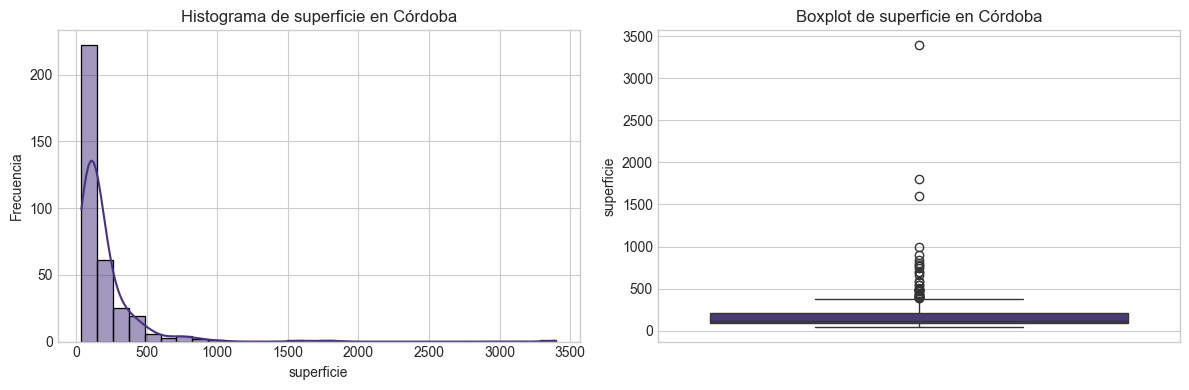

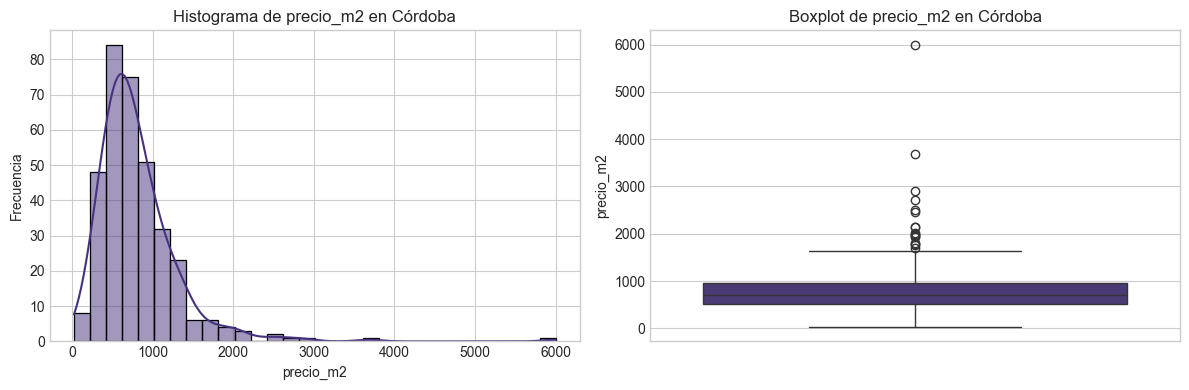

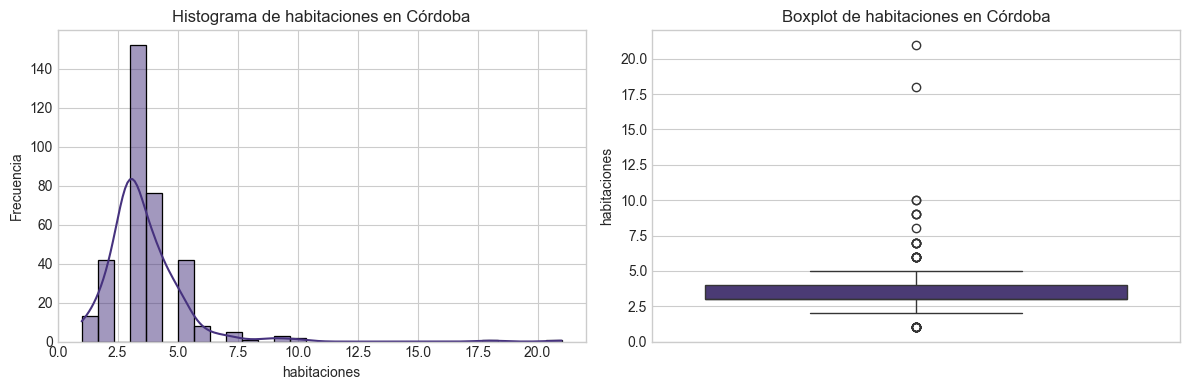

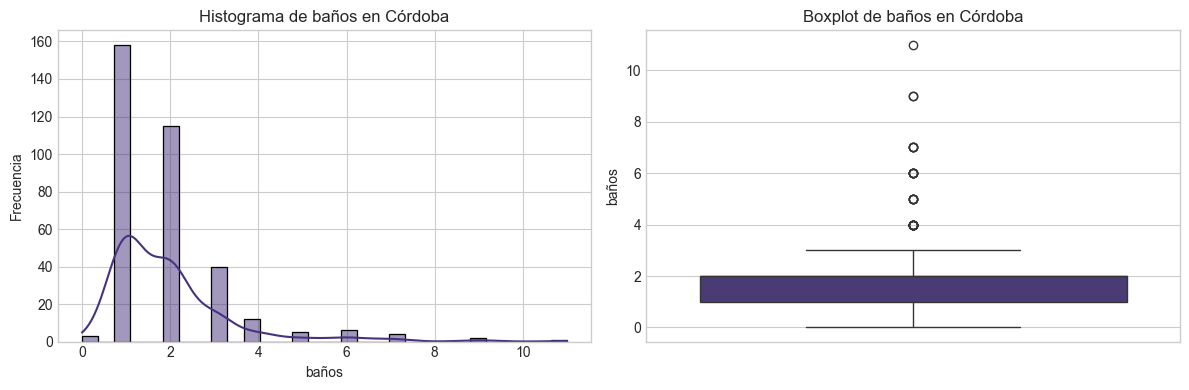

In [21]:
# Histogramas y Boxplots para Córdoba
if not df_cordoba.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Córdoba) ---")
    for col in cols_to_describe:
        if col in df_cordoba.columns and df_cordoba[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_cordoba[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Córdoba')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_cordoba[col].dropna())
            plt.title(f'Boxplot de {col} en Córdoba')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Córdoba.")

\n--- 3. Distribución de Tipo de Propiedad (Córdoba) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\2358379182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cordoba, y='tipo_propiedad', order=df_cordoba['tipo_propiedad'].value_counts().index, palette='viridis')


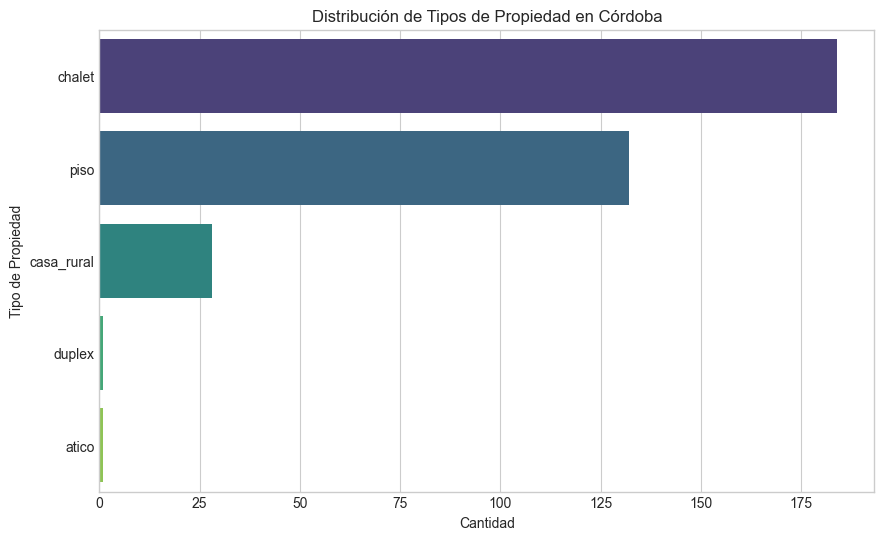

tipo_propiedad
chalet       53.18
piso         38.15
casa_rural    8.09
duplex        0.29
atico         0.29
Name: proportion, dtype: float64


In [22]:
# Distribución de Tipo de Propiedad en Córdoba
if not df_cordoba.empty and 'tipo_propiedad' in df_cordoba.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Córdoba) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cordoba, y='tipo_propiedad', order=df_cordoba['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Córdoba')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_cordoba['tipo_propiedad'].value_counts(normalize=True) * 100)

\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Córdoba) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\1800818418.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cordoba, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


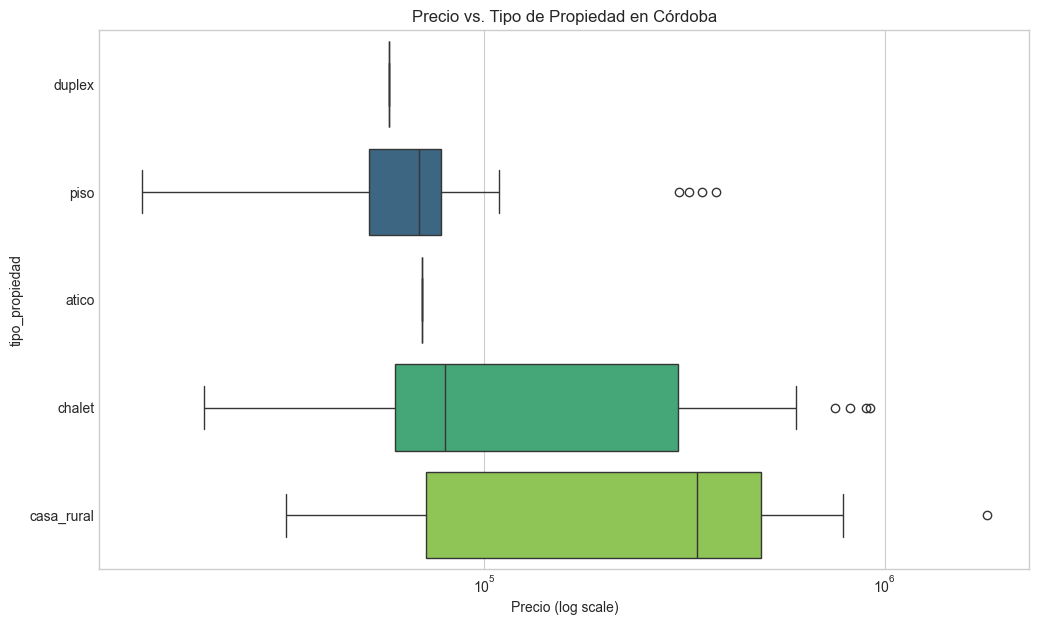

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\1800818418.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cordoba, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


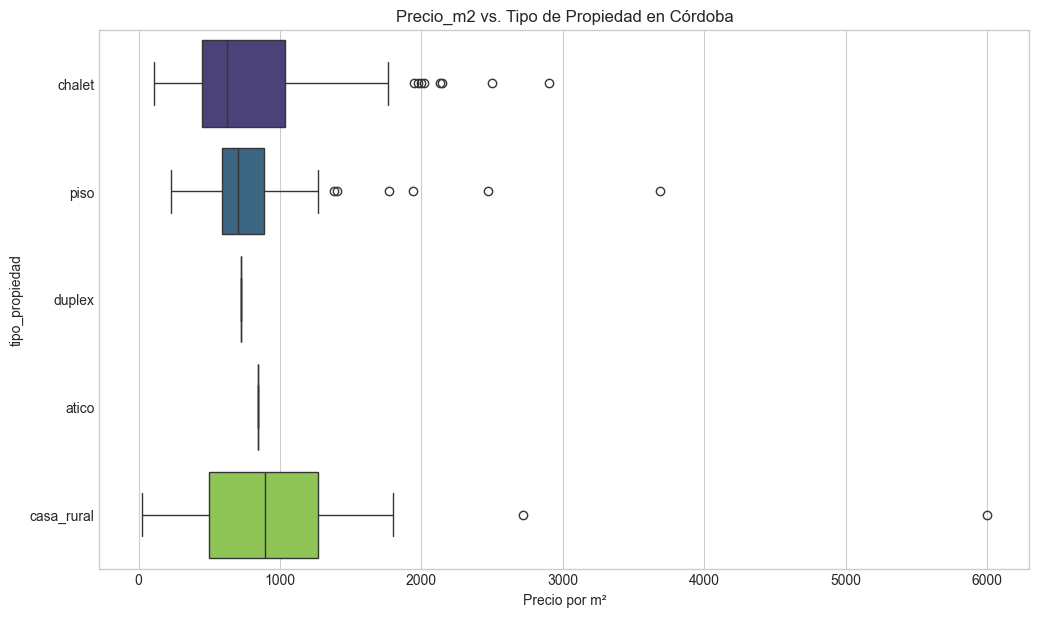

In [23]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Córdoba
if not df_cordoba.empty and 'tipo_propiedad' in df_cordoba.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Córdoba) ---")
    if 'precio' in df_cordoba.columns and df_cordoba['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_cordoba.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_cordoba, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Córdoba')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")

    if 'precio_m2' in df_cordoba.columns and df_cordoba['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_cordoba.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_cordoba, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Córdoba')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Córdoba) ---


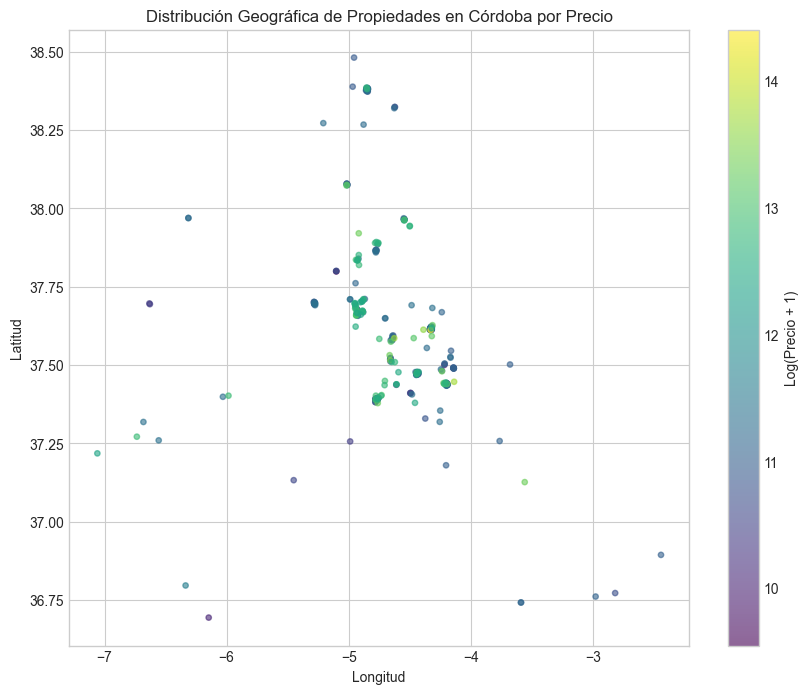

In [24]:
# Distribución Geoespacial de Propiedades en Córdoba
if not df_cordoba.empty and 'latitud' in df_cordoba.columns and 'longitud' in df_cordoba.columns:
    df_geo_cordoba = df_cordoba.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_cordoba.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Córdoba) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_cordoba['longitud'], df_geo_cordoba['latitud'], 
                              c=np.log1p(df_geo_cordoba['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Córdoba por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Córdoba.")

\n--- 6. Densidad de Propiedades y Precios Medios (Córdoba) ---


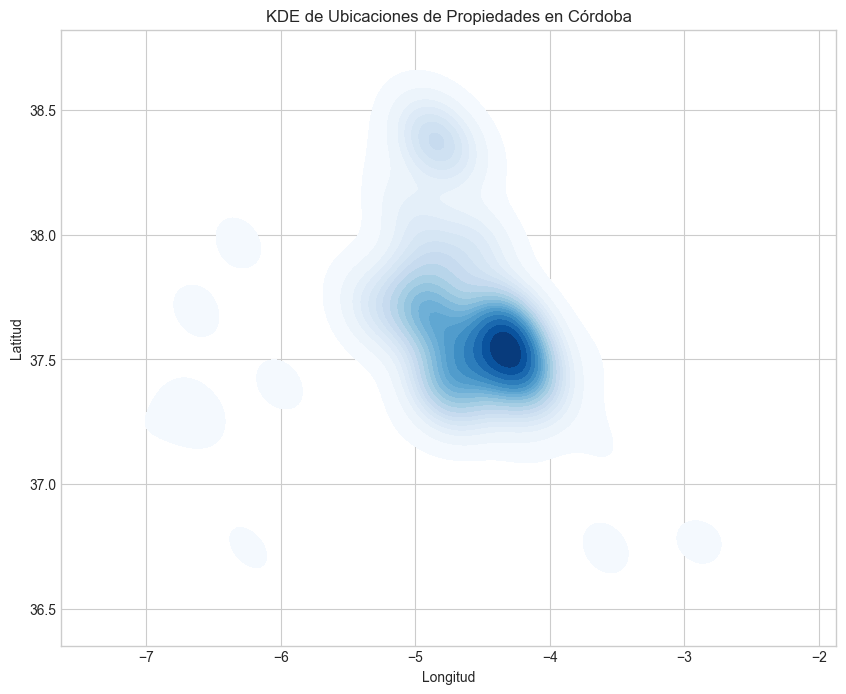

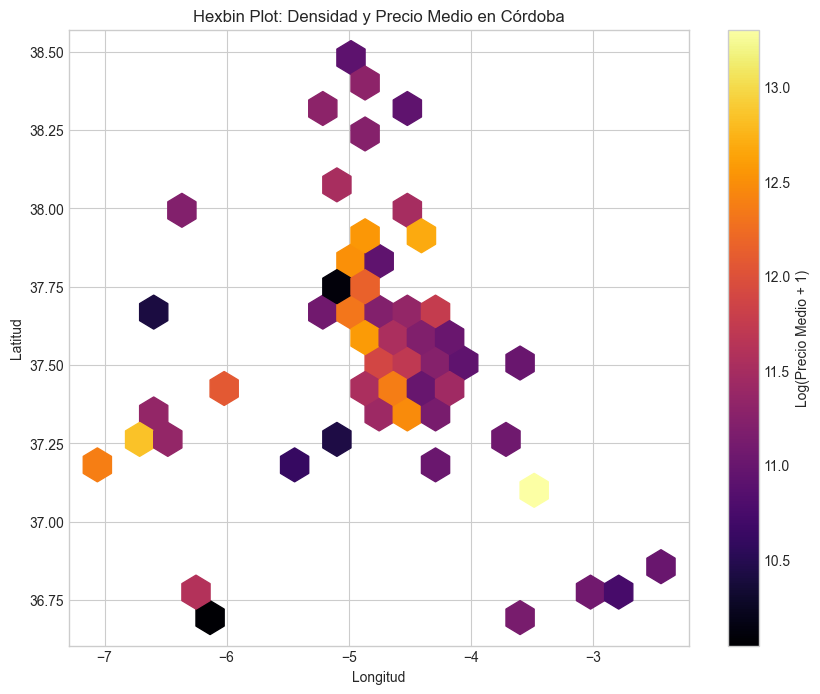

In [25]:
# Densidad de Propiedades y Precios Medios en Córdoba
if not df_cordoba.empty and 'latitud' in df_cordoba.columns and 'longitud' in df_cordoba.columns:
    df_geo_density_cordoba = df_cordoba.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_cordoba.empty and len(df_geo_density_cordoba) > 3:
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Córdoba) ---")
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_cordoba['longitud'], y=df_geo_density_cordoba['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Córdoba')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        df_hexbin_cordoba = df_geo_density_cordoba.dropna(subset=['precio'])
        if not df_hexbin_cordoba.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_cordoba['longitud'], df_hexbin_cordoba['latitud'], C=np.log1p(df_hexbin_cordoba['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Córdoba')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Córdoba después de filtrar NaNs.")
            
    elif not df_geo_density_cordoba.empty and len(df_geo_density_cordoba) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_cordoba)}) para generar KDE/Hexbin en Córdoba.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Córdoba.")

## Análisis Específico para la Provincia de Granada

In [26]:
# Filtrar DataFrame y Estadísticas Descriptivas para Granada
if not df.empty and 'provincia' in df.columns:
    df_granada = df[df['provincia'] == 'Granada'].copy()
    if df_granada.empty:
        print(f"No hay datos disponibles para la provincia de Granada.")
    else:
        print(f"Análisis para la provincia de Granada")
        print(f"Número de propiedades en Granada: {len(df_granada)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Granada) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_granada.columns]
        if cols_to_describe:
            display(df_granada[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Granada.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Granada
Número de propiedades en Granada: 282
\n--- 1. Estadísticas Descriptivas (Granada) ---


precio  superficie  precio_m2  habitaciones  baños
count     282.00      282.00     282.00        282.00 282.00
mean   354796.14      263.46    1027.00          3.89   2.11
std    855146.46      458.47    1171.70          2.63   2.18
min     13000.00       37.00      12.48          0.00   0.00
25%     52850.00       85.00     425.18          2.25   1.00
50%     69900.00      126.00     722.22          3.00   1.00
75%    362500.00      313.50    1154.06          5.00   2.00
max   8800000.00     6000.00    9839.36         24.00  24.00

\n--- 2. Distribuciones de Variables Numéricas (Granada) ---


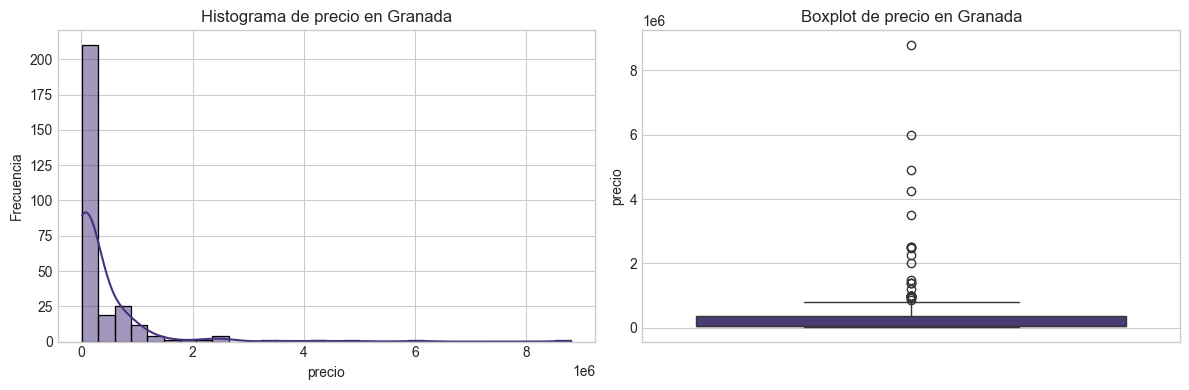

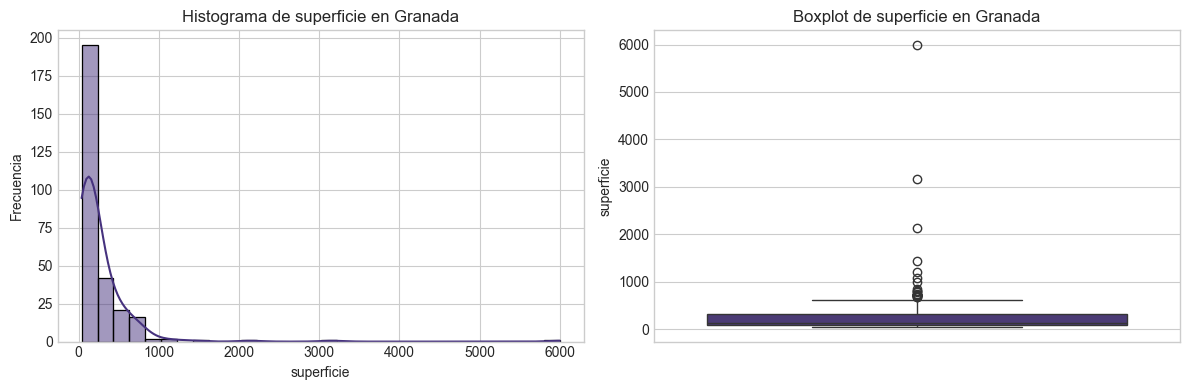

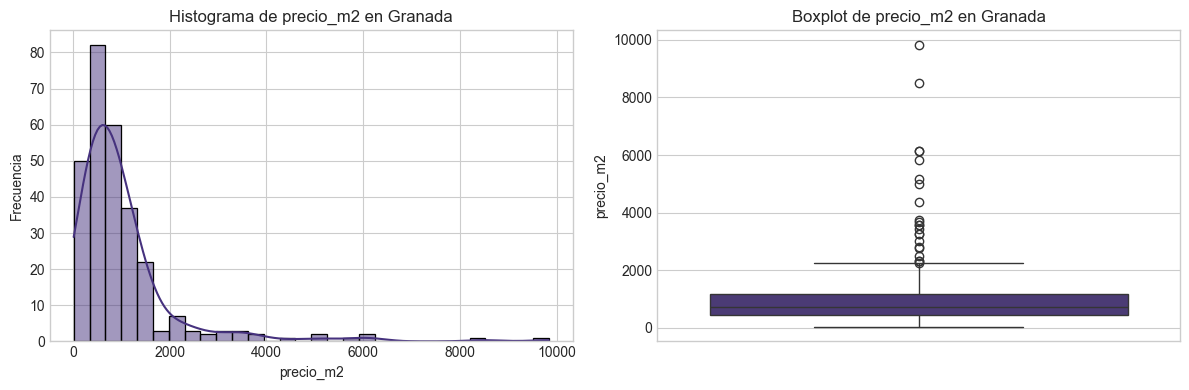

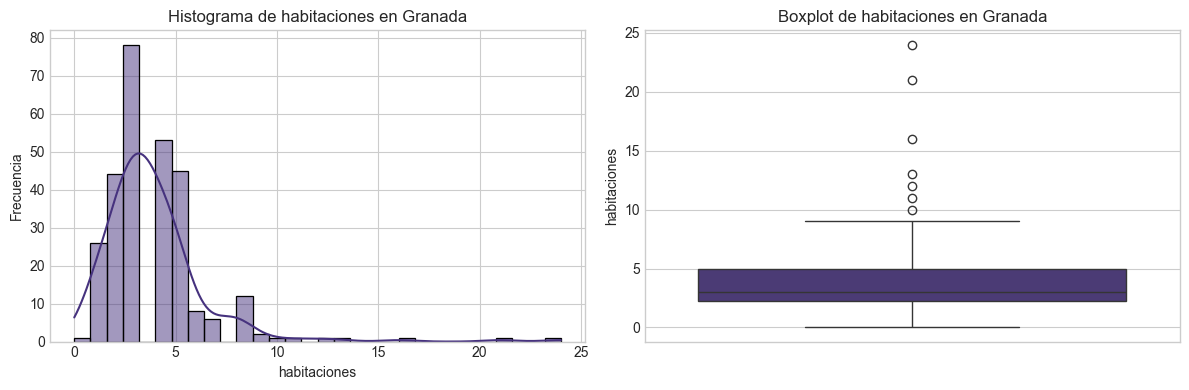

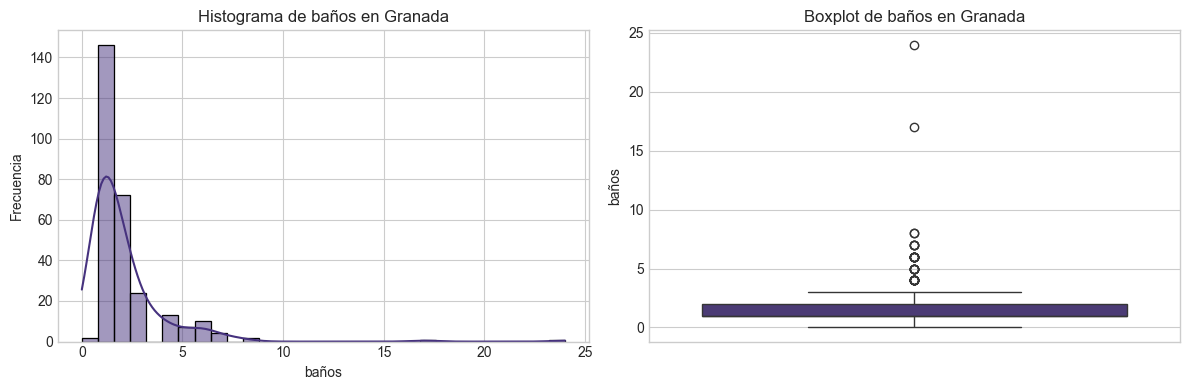

In [27]:
# Histogramas y Boxplots para Granada
if not df_granada.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Granada) ---")
    for col in cols_to_describe:
        if col in df_granada.columns and df_granada[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_granada[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Granada')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_granada[col].dropna())
            plt.title(f'Boxplot de {col} en Granada')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Granada.")

\n--- 3. Distribución de Tipo de Propiedad (Granada) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\3870386535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_granada, y='tipo_propiedad', order=df_granada['tipo_propiedad'].value_counts().index, palette='viridis')


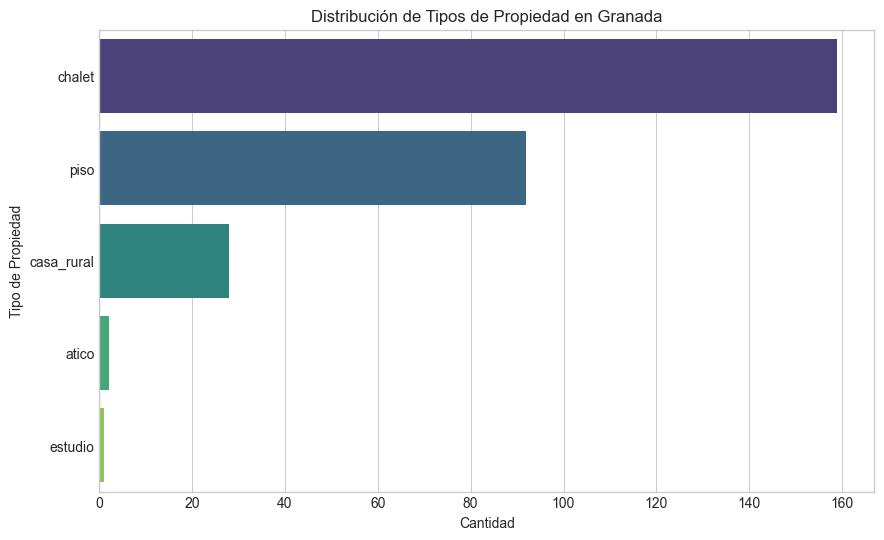

tipo_propiedad
chalet       56.38
piso         32.62
casa_rural    9.93
atico         0.71
estudio       0.35
Name: proportion, dtype: float64


In [28]:
# Distribución de Tipo de Propiedad en Granada
if not df_granada.empty and 'tipo_propiedad' in df_granada.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Granada) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_granada, y='tipo_propiedad', order=df_granada['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Granada')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_granada['tipo_propiedad'].value_counts(normalize=True) * 100)

\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Granada) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\3506170596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_granada, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


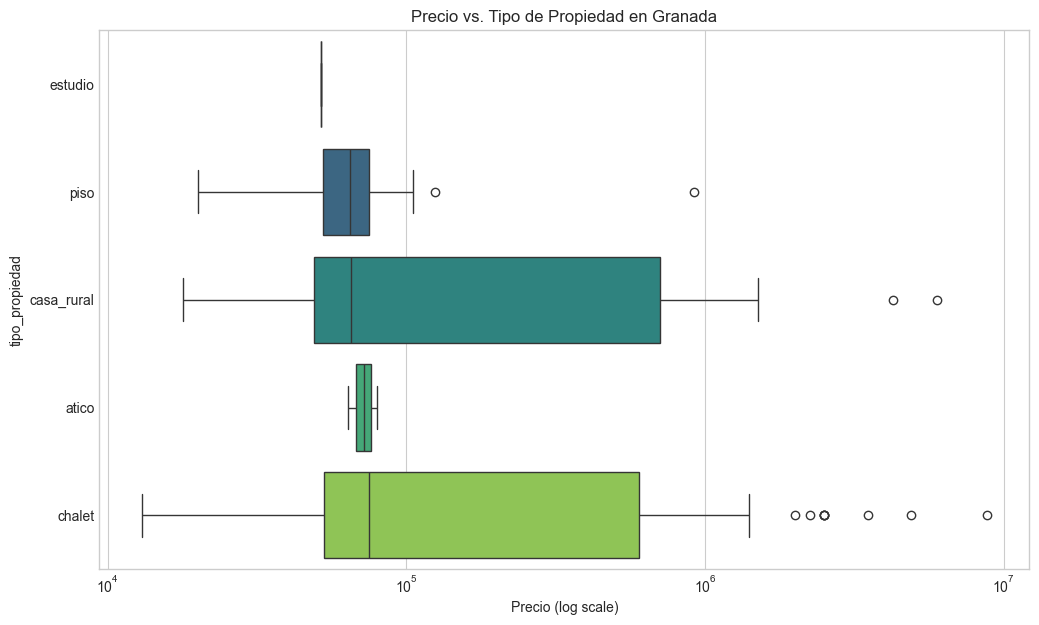

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\3506170596.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_granada, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


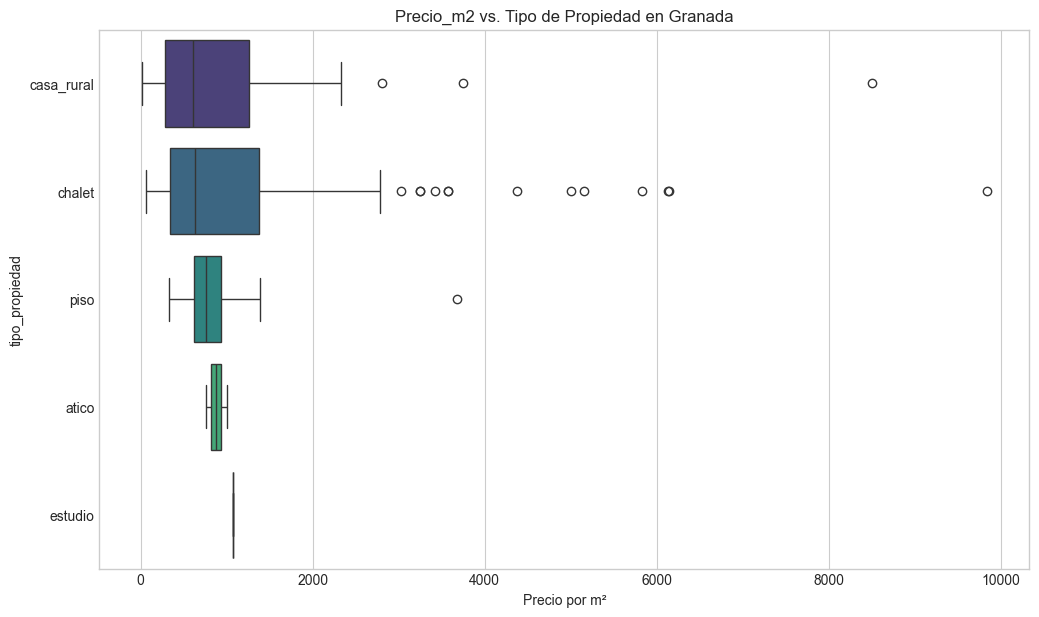

In [29]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Granada
if not df_granada.empty and 'tipo_propiedad' in df_granada.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Granada) ---")
    if 'precio' in df_granada.columns and df_granada['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_granada.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_granada, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Granada')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")

    if 'precio_m2' in df_granada.columns and df_granada['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_granada.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_granada, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Granada')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Granada) ---


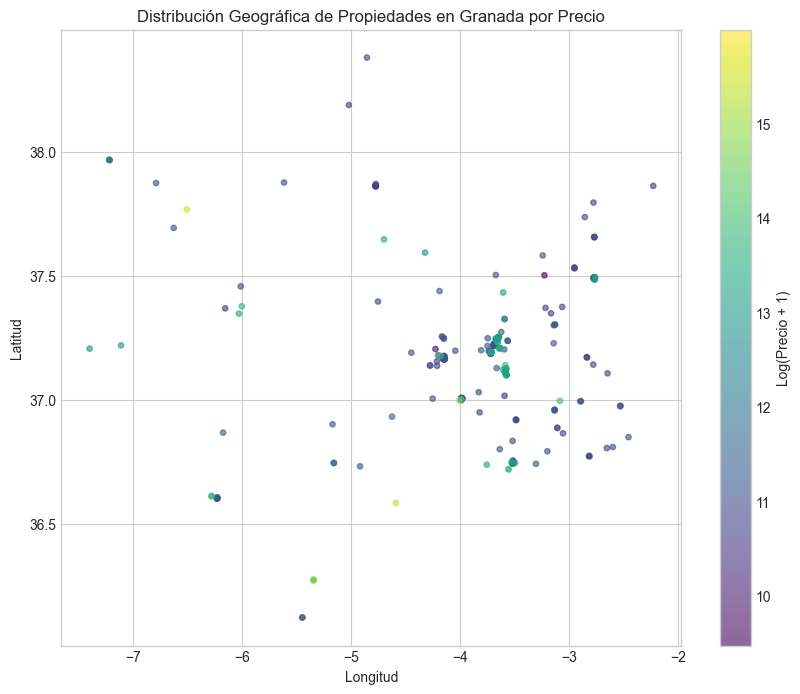

In [30]:
# Distribución Geoespacial de Propiedades en Granada
if not df_granada.empty and 'latitud' in df_granada.columns and 'longitud' in df_granada.columns:
    df_geo_granada = df_granada.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_granada.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Granada) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_granada['longitud'], df_geo_granada['latitud'], 
                              c=np.log1p(df_geo_granada['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Granada por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Granada.")

\n--- 6. Densidad de Propiedades y Precios Medios (Granada) ---


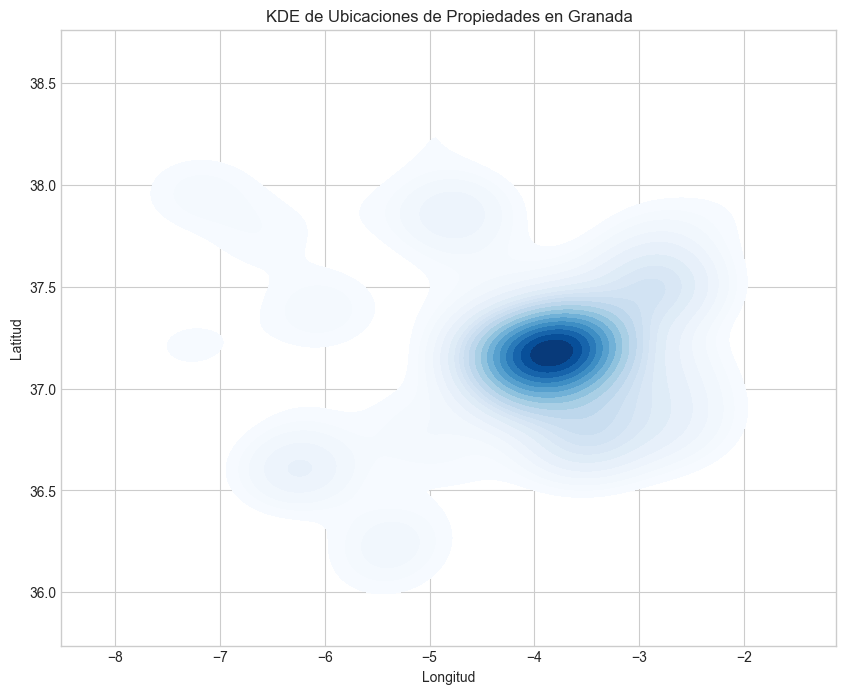

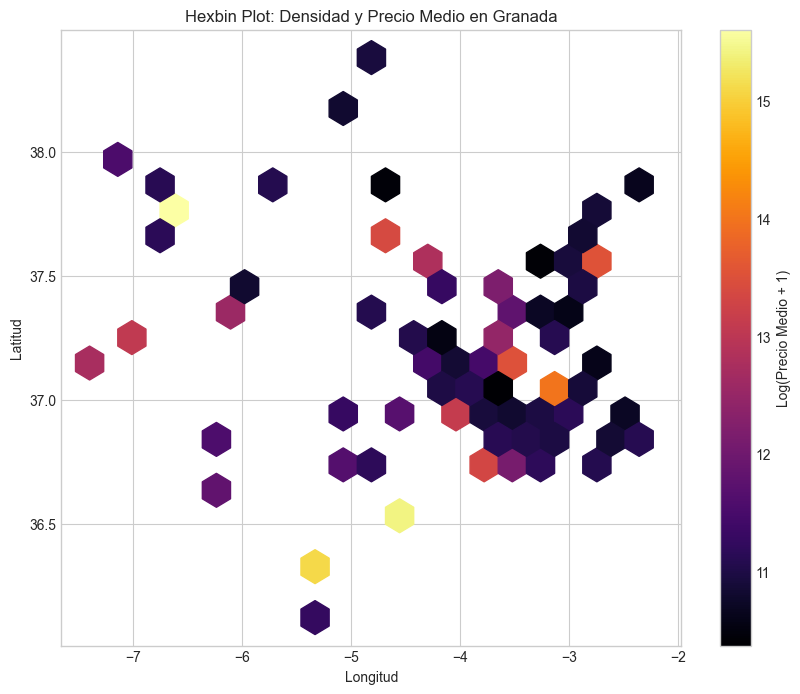

In [31]:
# Densidad de Propiedades y Precios Medios en Granada
if not df_granada.empty and 'latitud' in df_granada.columns and 'longitud' in df_granada.columns:
    df_geo_density_granada = df_granada.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_granada.empty and len(df_geo_density_granada) > 3:
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Granada) ---")
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_granada['longitud'], y=df_geo_density_granada['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Granada')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        df_hexbin_granada = df_geo_density_granada.dropna(subset=['precio'])
        if not df_hexbin_granada.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_granada['longitud'], df_hexbin_granada['latitud'], C=np.log1p(df_hexbin_granada['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Granada')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Granada después de filtrar NaNs.")
            
    elif not df_geo_density_granada.empty and len(df_geo_density_granada) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_granada)}) para generar KDE/Hexbin en Granada.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Granada.")

## Análisis Específico para la Provincia de Huelva

In [32]:
# Filtrar DataFrame y Estadísticas Descriptivas para Huelva
if not df.empty and 'provincia' in df.columns:
    df_huelva = df[df['provincia'] == 'Huelva'].copy()
    if df_huelva.empty:
        print(f"No hay datos disponibles para la provincia de Huelva.")
    else:
        print(f"Análisis para la provincia de Huelva")
        print(f"Número de propiedades en Huelva: {len(df_huelva)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Huelva) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_huelva.columns]
        if cols_to_describe:
            display(df_huelva[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Huelva.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Huelva
Número de propiedades en Huelva: 379
\n--- 1. Estadísticas Descriptivas (Huelva) ---


precio  superficie  precio_m2  habitaciones  baños
count     379.00      379.00     379.00        379.00 379.00
mean   286202.36      226.89    1426.50          3.79   2.36
std    335338.17      351.89     808.52          1.91   2.20
min     16800.00       23.00      57.62          0.00   0.00
25%     87950.00       85.00     912.74          3.00   1.00
50%    199000.00      120.00    1177.59          3.00   2.00
75%    359500.00      227.00    1801.86          4.00   3.00
max   1880000.00     3818.00    5612.24         17.00  13.00

\n--- 2. Distribuciones de Variables Numéricas (Huelva) ---


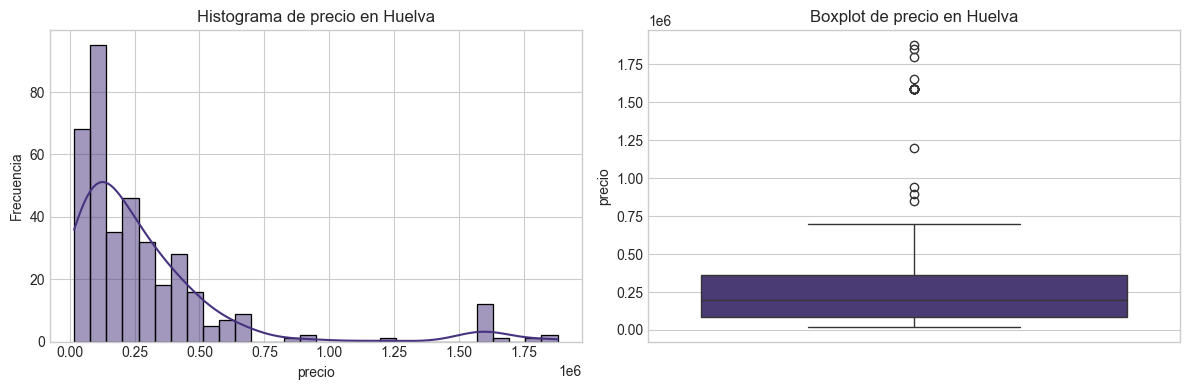

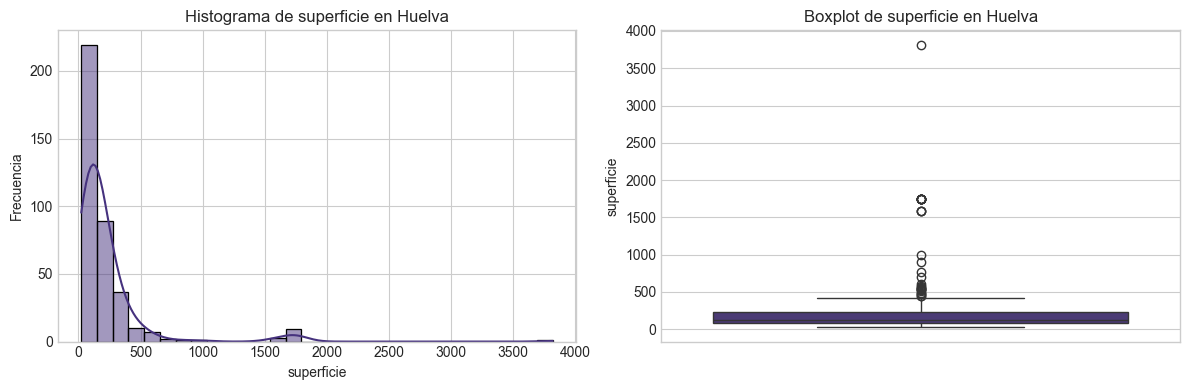

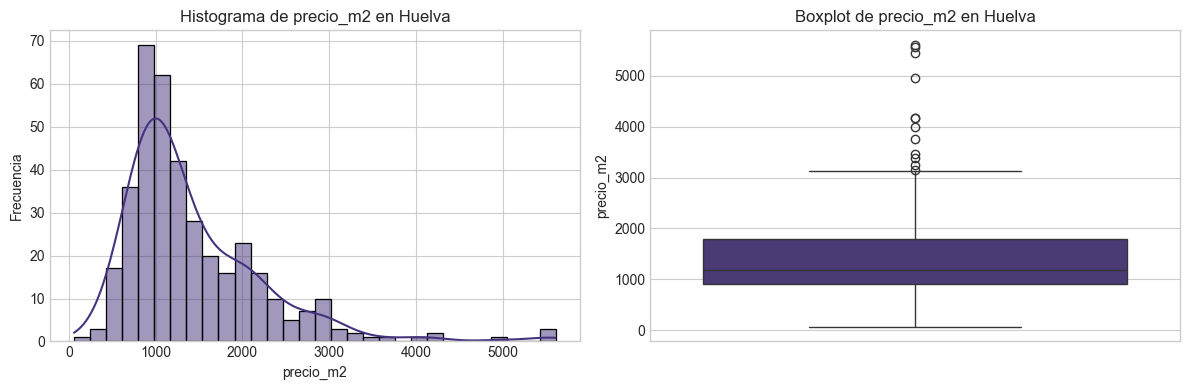

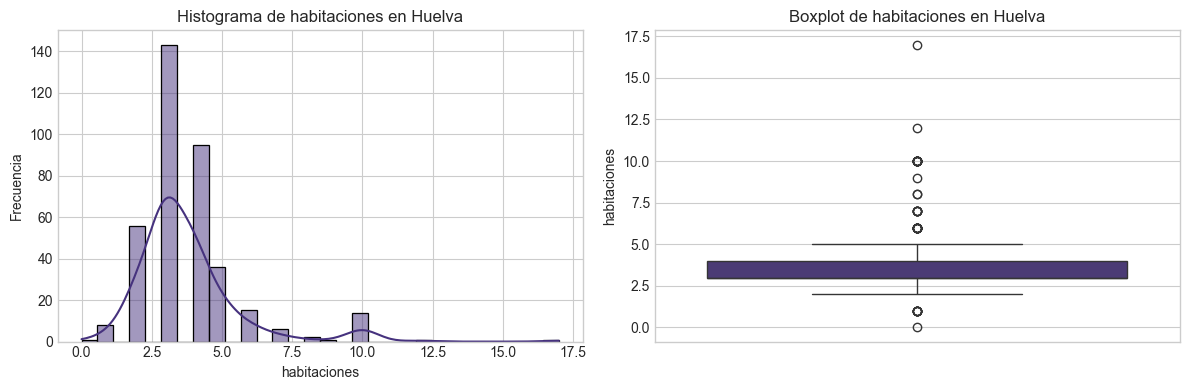

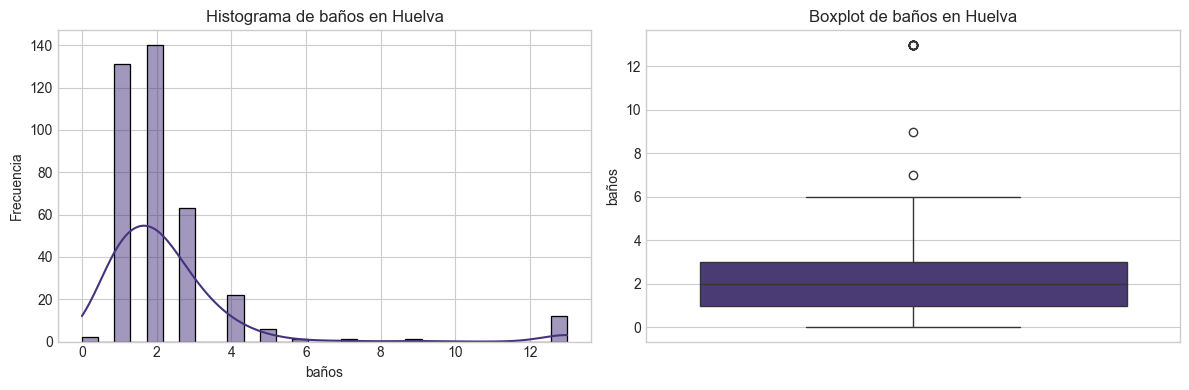

In [33]:
# Histogramas y Boxplots para Huelva
if not df_huelva.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Huelva) ---")
    for col in cols_to_describe:
        if col in df_huelva.columns and df_huelva[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_huelva[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Huelva')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_huelva[col].dropna())
            plt.title(f'Boxplot de {col} en Huelva')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Huelva.")

\n--- 3. Distribución de Tipo de Propiedad (Huelva) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\2687068210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_huelva, y='tipo_propiedad', order=df_huelva['tipo_propiedad'].value_counts().index, palette='viridis')


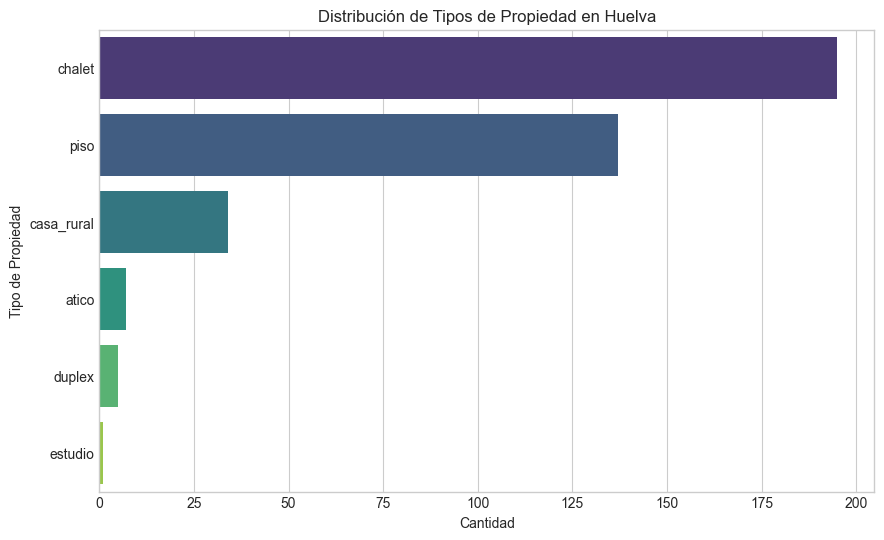

tipo_propiedad
chalet       51.45
piso         36.15
casa_rural    8.97
atico         1.85
duplex        1.32
estudio       0.26
Name: proportion, dtype: float64


In [34]:
# Distribución de Tipo de Propiedad en Huelva
if not df_huelva.empty and 'tipo_propiedad' in df_huelva.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Huelva) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_huelva, y='tipo_propiedad', order=df_huelva['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Huelva')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_huelva['tipo_propiedad'].value_counts(normalize=True) * 100)

\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Huelva) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\2361960794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_huelva, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


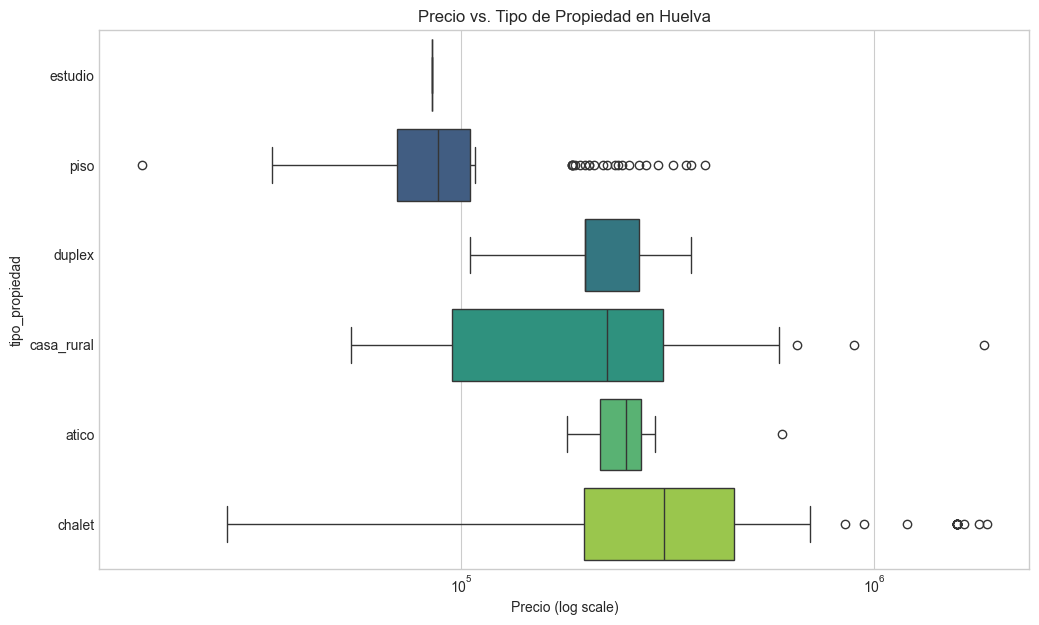

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\2361960794.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_huelva, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


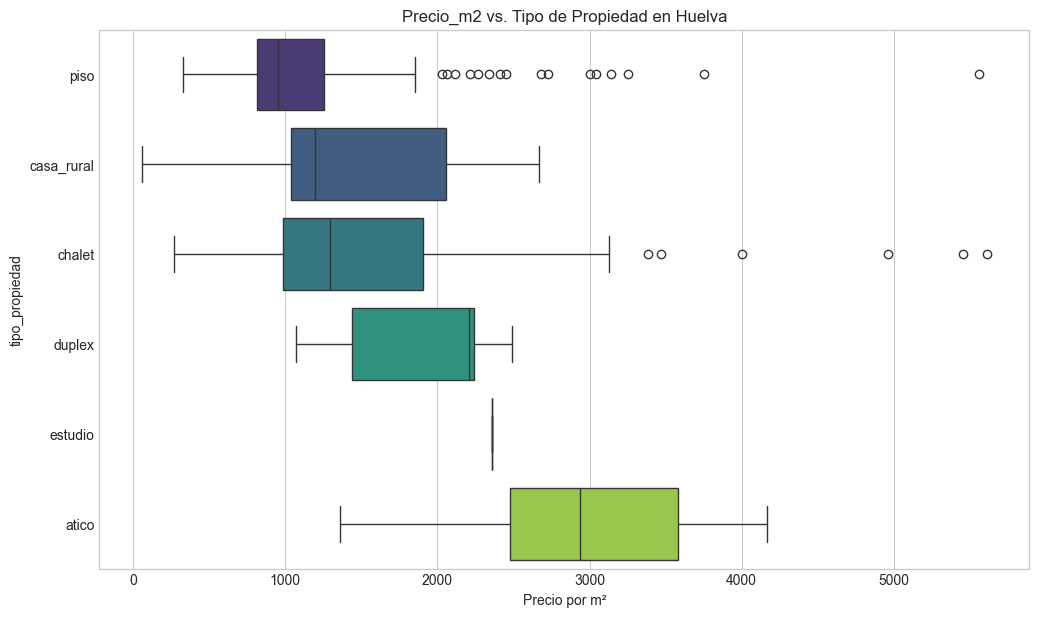

In [35]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Huelva
if not df_huelva.empty and 'tipo_propiedad' in df_huelva.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Huelva) ---")
    if 'precio' in df_huelva.columns and df_huelva['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_huelva.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_huelva, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Huelva')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")

    if 'precio_m2' in df_huelva.columns and df_huelva['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_huelva.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_huelva, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Huelva')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Huelva) ---


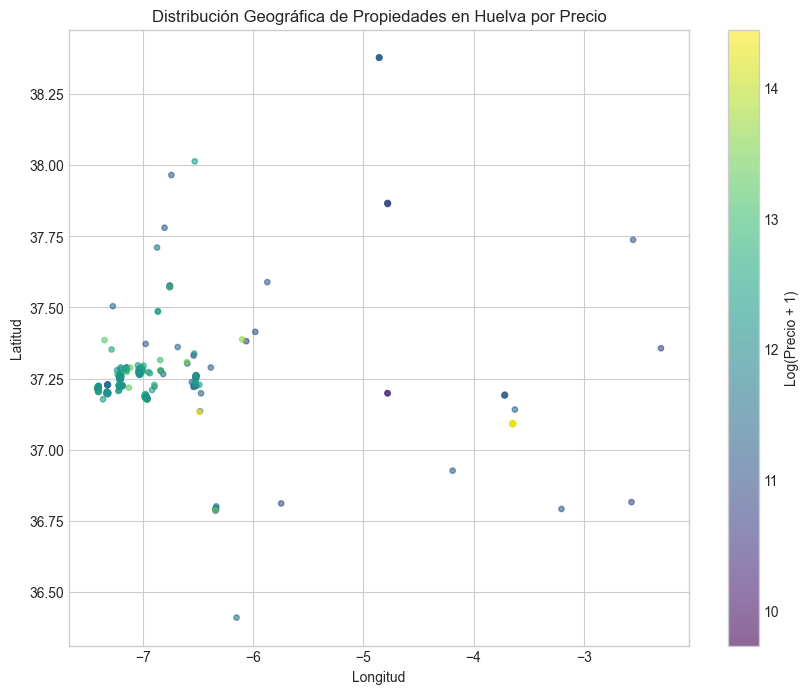

In [36]:
# Distribución Geoespacial de Propiedades en Huelva
if not df_huelva.empty and 'latitud' in df_huelva.columns and 'longitud' in df_huelva.columns:
    df_geo_huelva = df_huelva.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_huelva.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Huelva) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_huelva['longitud'], df_geo_huelva['latitud'], 
                              c=np.log1p(df_geo_huelva['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Huelva por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Huelva.")

\n--- 6. Densidad de Propiedades y Precios Medios (Huelva) ---


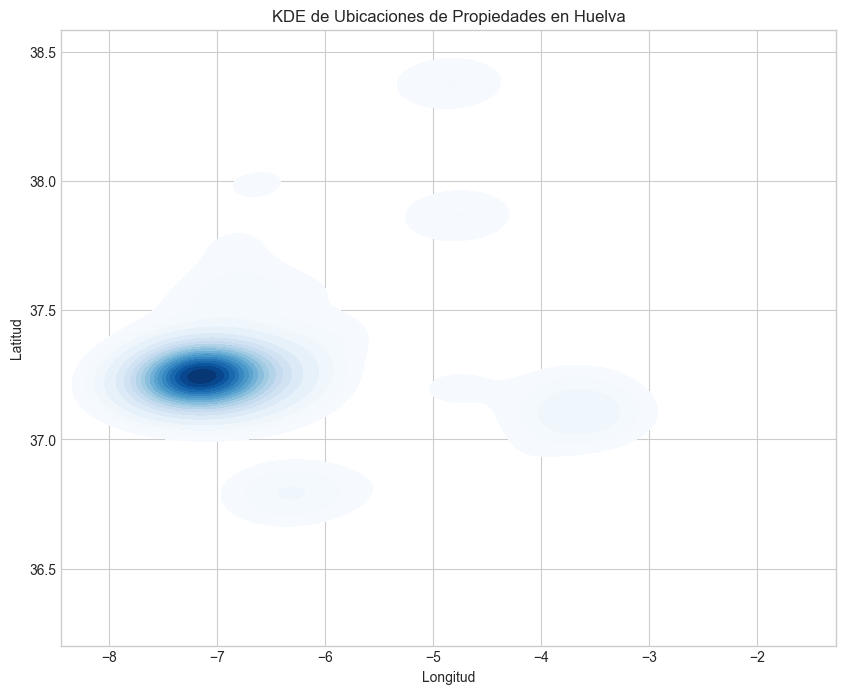

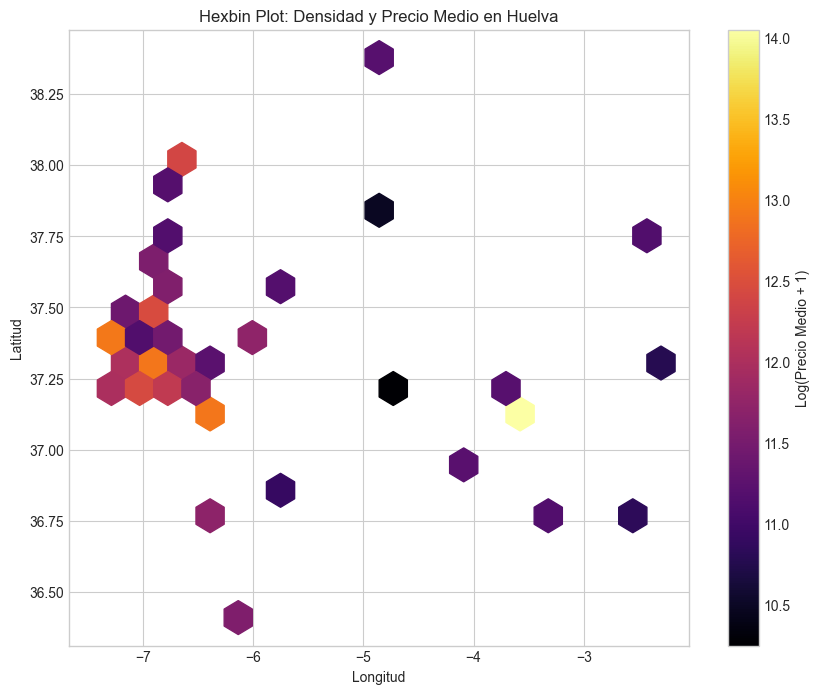

In [37]:
# Densidad de Propiedades y Precios Medios en Huelva
if not df_huelva.empty and 'latitud' in df_huelva.columns and 'longitud' in df_huelva.columns:
    df_geo_density_huelva = df_huelva.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_huelva.empty and len(df_geo_density_huelva) > 3:
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Huelva) ---")
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_huelva['longitud'], y=df_geo_density_huelva['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Huelva')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        df_hexbin_huelva = df_geo_density_huelva.dropna(subset=['precio'])
        if not df_hexbin_huelva.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_huelva['longitud'], df_hexbin_huelva['latitud'], C=np.log1p(df_hexbin_huelva['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Huelva')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Huelva después de filtrar NaNs.")
            
    elif not df_geo_density_huelva.empty and len(df_geo_density_huelva) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_huelva)}) para generar KDE/Hexbin en Huelva.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Huelva.")

## Análisis Específico para la Provincia de Jaén

In [38]:
# Filtrar DataFrame y Estadísticas Descriptivas para Jaén
if not df.empty and 'provincia' in df.columns:
    df_jaen = df[df['provincia'] == 'Jaén'].copy()
    if df_jaen.empty:
        print(f"No hay datos disponibles para la provincia de Jaén.")
    else:
        print(f"Análisis para la provincia de Jaén")
        print(f"Número de propiedades en Jaén: {len(df_jaen)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Jaén) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_jaen.columns]
        if cols_to_describe:
            display(df_jaen[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Jaén.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Jaén
Número de propiedades en Jaén: 65
\n--- 1. Estadísticas Descriptivas (Jaén) ---


precio  superficie  precio_m2  habitaciones  baños
count      65.00       65.00      65.00         65.00  65.00
mean  1473916.92      274.08    2698.67          3.80   2.35
std   2429933.31      286.84    3195.01          1.93   2.02
min     18600.00       48.00     210.53          0.00   0.00
25%     55000.00       80.00     587.91          3.00   1.00
50%     80000.00      115.00    1008.93          3.00   1.00
75%    950000.00      598.00    4882.81          5.00   3.00
max   8995000.00     1038.00    9519.57         10.00   8.00

\n--- 2. Distribuciones de Variables Numéricas (Jaén) ---


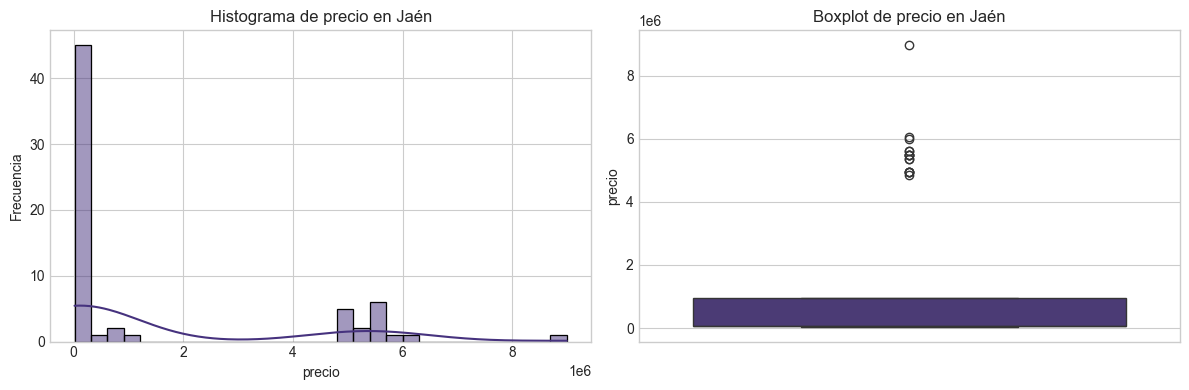

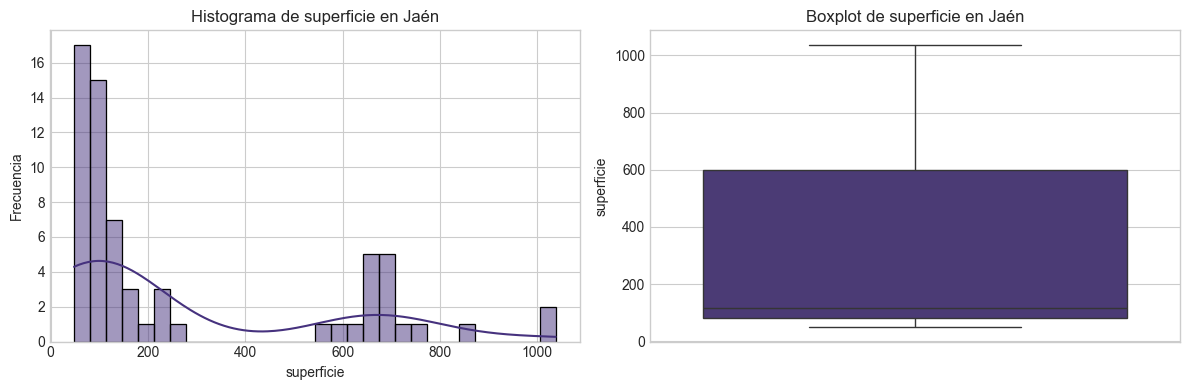

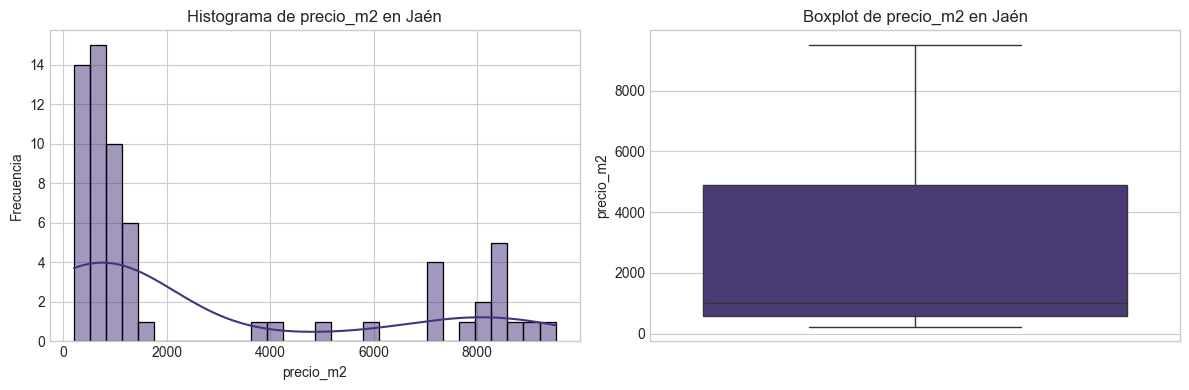

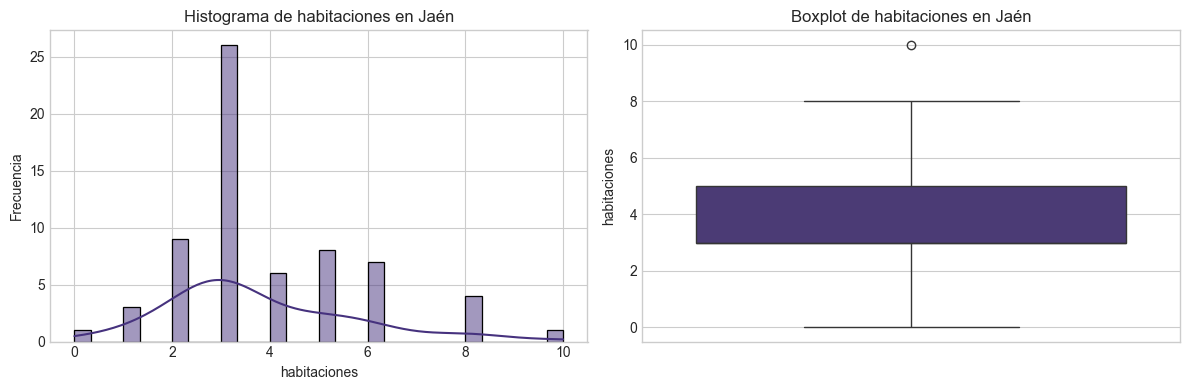

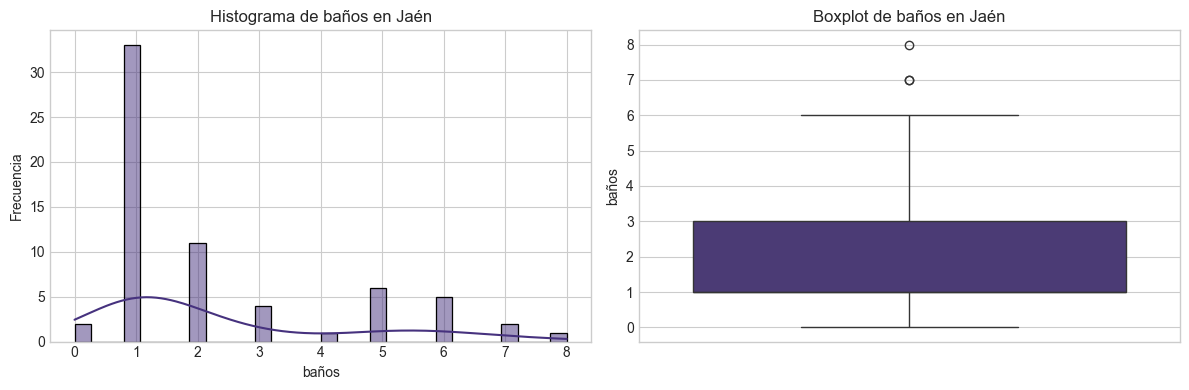

In [39]:
# Histogramas y Boxplots para Jaén
if not df_jaen.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Jaén) ---")
    for col in cols_to_describe:
        if col in df_jaen.columns and df_jaen[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_jaen[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Jaén')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_jaen[col].dropna())
            plt.title(f'Boxplot de {col} en Jaén')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Jaén.")

\n--- 3. Distribución de Tipo de Propiedad (Jaén) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\443335156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_jaen, y='tipo_propiedad', order=df_jaen['tipo_propiedad'].value_counts().index, palette='viridis')


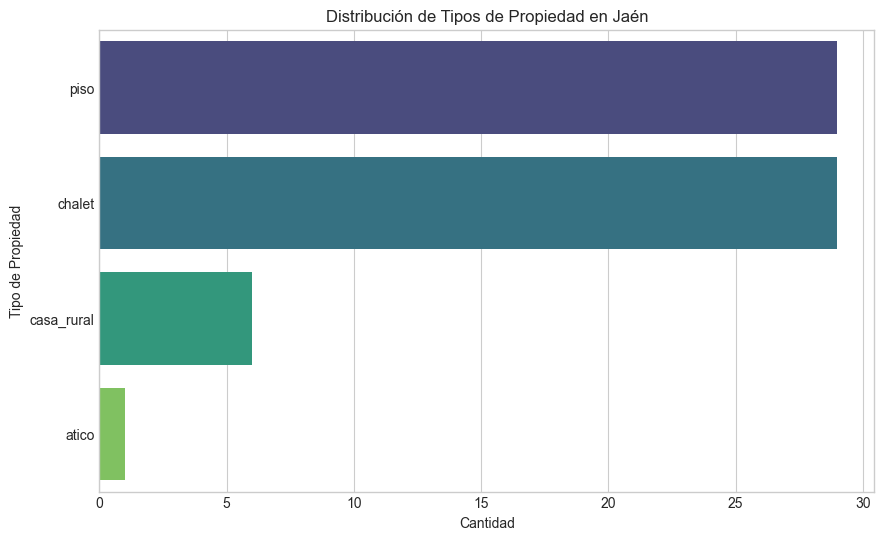

tipo_propiedad
piso         44.62
chalet       44.62
casa_rural    9.23
atico         1.54
Name: proportion, dtype: float64


In [40]:
# Distribución de Tipo de Propiedad en Jaén
if not df_jaen.empty and 'tipo_propiedad' in df_jaen.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Jaén) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_jaen, y='tipo_propiedad', order=df_jaen['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Jaén')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_jaen['tipo_propiedad'].value_counts(normalize=True) * 100)

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\1593718432.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_jaen, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Jaén) ---


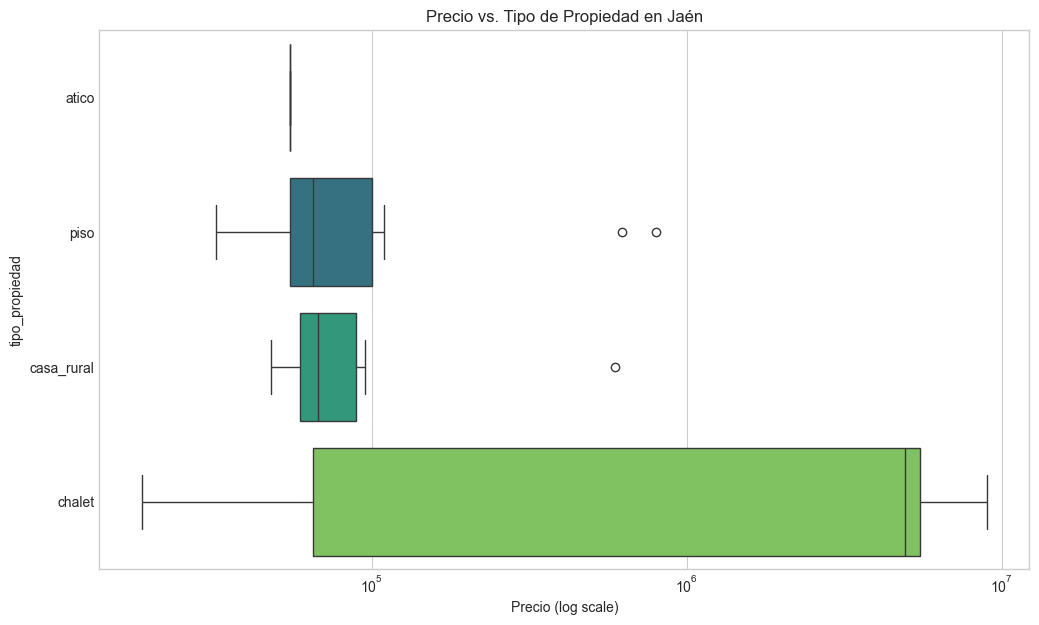

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\1593718432.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_jaen, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


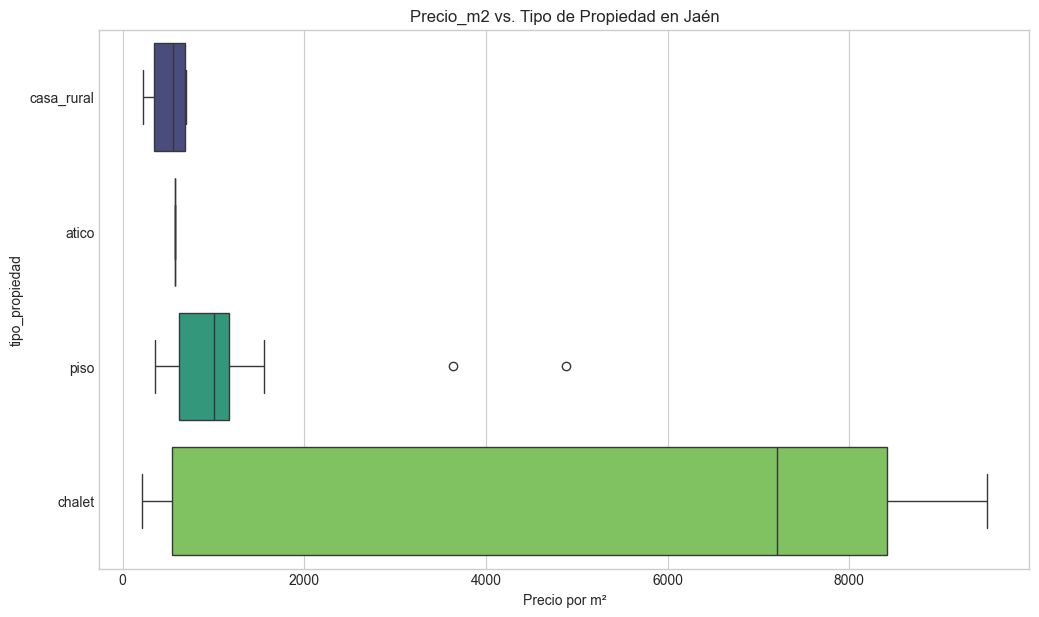

In [41]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Jaén
if not df_jaen.empty and 'tipo_propiedad' in df_jaen.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Jaén) ---")
    if 'precio' in df_jaen.columns and df_jaen['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_jaen.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_jaen, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Jaén')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")

    if 'precio_m2' in df_jaen.columns and df_jaen['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_jaen.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_jaen, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Jaén')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Jaén) ---


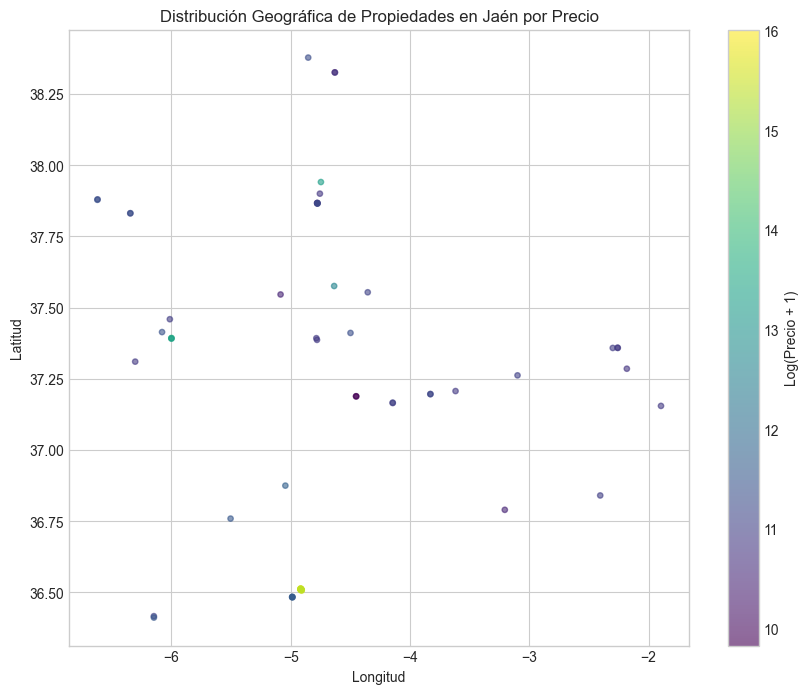

In [42]:
# Distribución Geoespacial de Propiedades en Jaén
if not df_jaen.empty and 'latitud' in df_jaen.columns and 'longitud' in df_jaen.columns:
    df_geo_jaen = df_jaen.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_jaen.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Jaén) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_jaen['longitud'], df_geo_jaen['latitud'], 
                              c=np.log1p(df_geo_jaen['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Jaén por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Jaén.")

\n--- 6. Densidad de Propiedades y Precios Medios (Jaén) ---


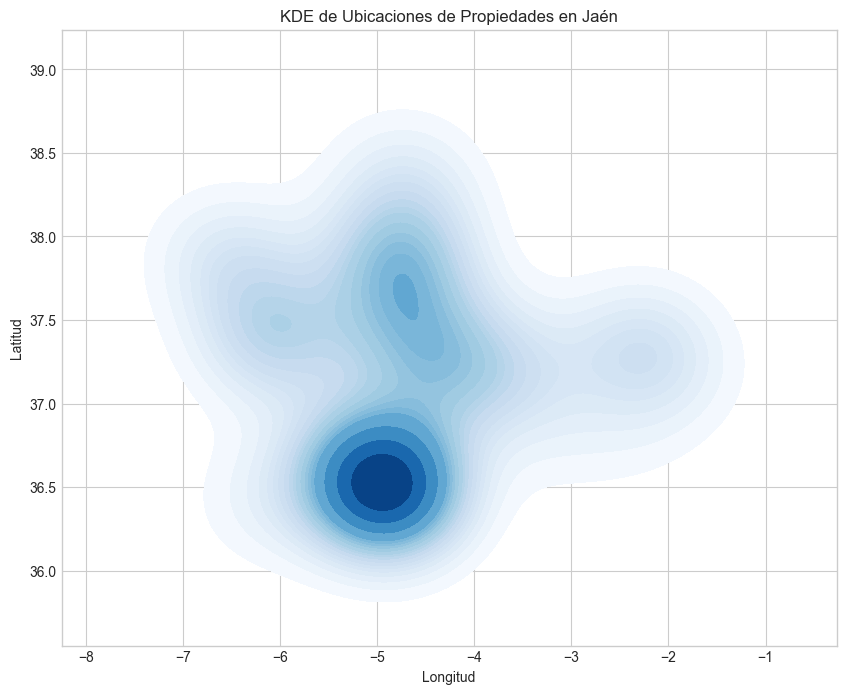

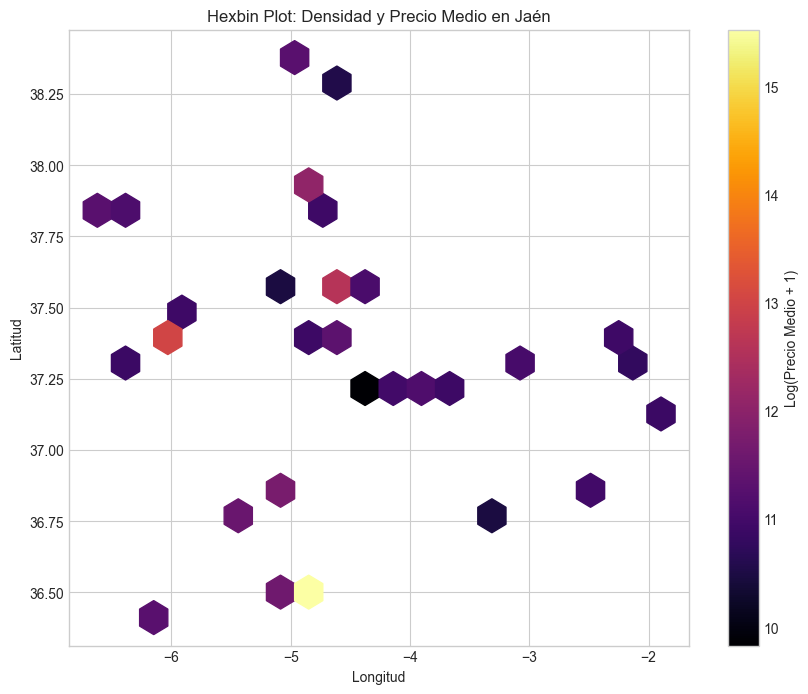

In [43]:
# Densidad de Propiedades y Precios Medios en Jaén
if not df_jaen.empty and 'latitud' in df_jaen.columns and 'longitud' in df_jaen.columns:
    df_geo_density_jaen = df_jaen.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_jaen.empty and len(df_geo_density_jaen) > 3:
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Jaén) ---")
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_jaen['longitud'], y=df_geo_density_jaen['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Jaén')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        df_hexbin_jaen = df_geo_density_jaen.dropna(subset=['precio'])
        if not df_hexbin_jaen.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_jaen['longitud'], df_hexbin_jaen['latitud'], C=np.log1p(df_hexbin_jaen['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Jaén')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Jaén después de filtrar NaNs.")
            
    elif not df_geo_density_jaen.empty and len(df_geo_density_jaen) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_jaen)}) para generar KDE/Hexbin en Jaén.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Jaén.")

## Análisis Específico para la Provincia de Málaga

In [44]:
# Filtrar DataFrame y Estadísticas Descriptivas para Málaga
if not df.empty and 'provincia' in df.columns:
    df_malaga = df[df['provincia'] == 'Málaga'].copy()
    if df_malaga.empty:
        print(f"No hay datos disponibles para la provincia de Málaga.")
    else:
        print(f"Análisis para la provincia de Málaga")
        print(f"Número de propiedades en Málaga: {len(df_malaga)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Málaga) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_malaga.columns]
        if cols_to_describe:
            display(df_malaga[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Málaga.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Málaga
Número de propiedades en Málaga: 338
\n--- 1. Estadísticas Descriptivas (Málaga) ---


precio  superficie  precio_m2  habitaciones  baños
count      338.00      338.00     338.00        338.00 338.00
mean   1720223.18      342.29    2967.85          3.87   2.98
std    2747476.04      374.00    2916.40          1.71   2.19
min      18000.00       40.00      98.90          0.00   0.00
25%      81237.00       99.25     913.67          3.00   1.00
50%     307500.00      171.50    1678.21          4.00   2.00
75%    1650000.00      578.50    4312.46          5.00   4.00
max   12900000.00     2800.00    9891.81         10.00  12.00

\n--- 2. Distribuciones de Variables Numéricas (Málaga) ---


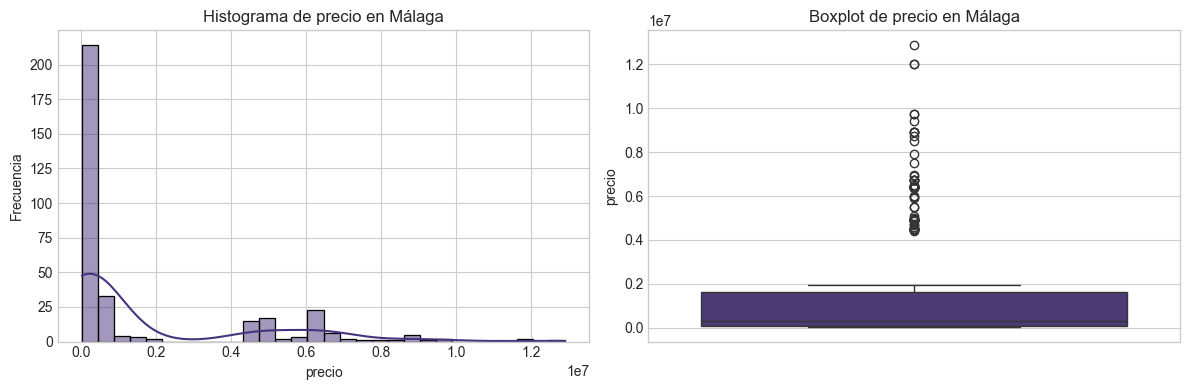

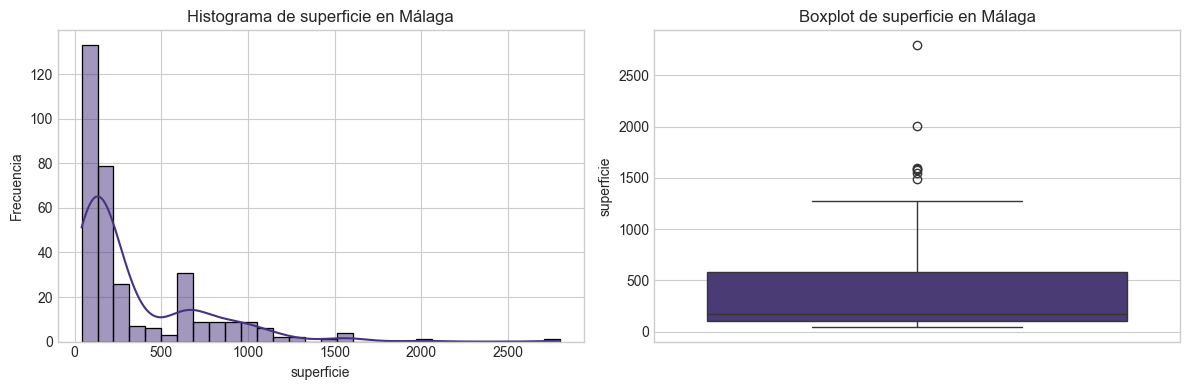

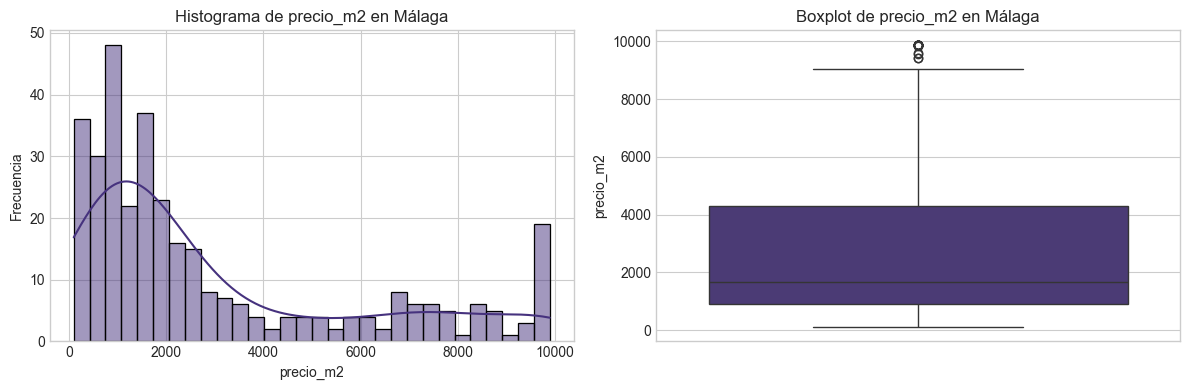

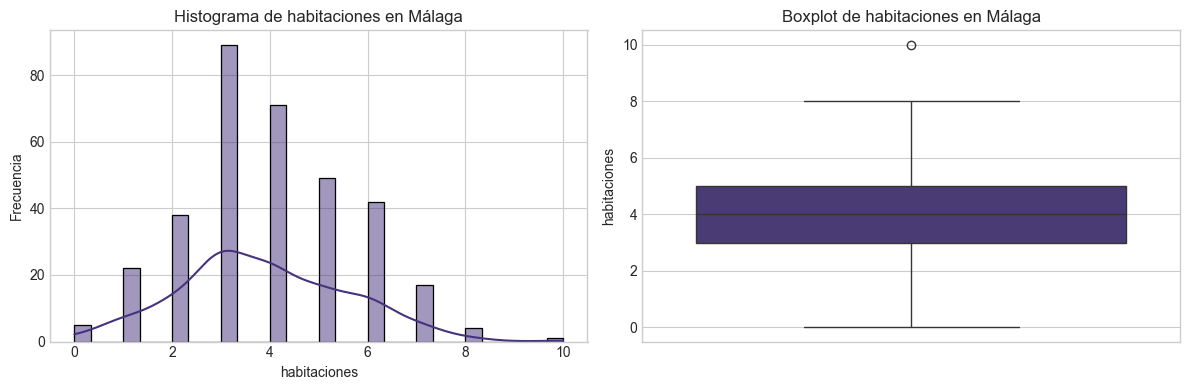

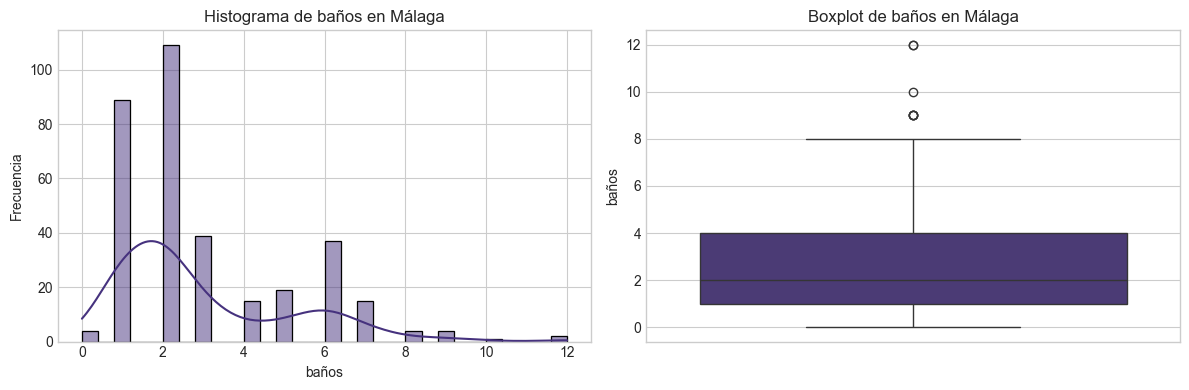

In [45]:
# Histogramas y Boxplots para Málaga
if not df_malaga.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Málaga) ---")
    for col in cols_to_describe:
        if col in df_malaga.columns and df_malaga[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_malaga[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Málaga')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_malaga[col].dropna())
            plt.title(f'Boxplot de {col} en Málaga')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Málaga.")

\n--- 3. Distribución de Tipo de Propiedad (Málaga) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\3599631377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_malaga, y='tipo_propiedad', order=df_malaga['tipo_propiedad'].value_counts().index, palette='viridis')


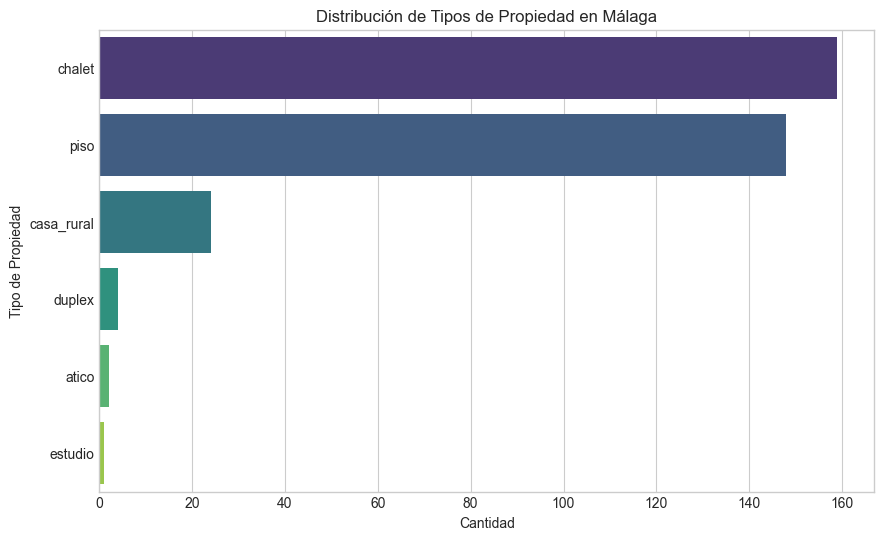

tipo_propiedad
chalet       47.04
piso         43.79
casa_rural    7.10
duplex        1.18
atico         0.59
estudio       0.30
Name: proportion, dtype: float64


In [46]:
# Distribución de Tipo de Propiedad en Málaga
if not df_malaga.empty and 'tipo_propiedad' in df_malaga.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Málaga) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_malaga, y='tipo_propiedad', order=df_malaga['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Málaga')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_malaga['tipo_propiedad'].value_counts(normalize=True) * 100)

\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Málaga) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\2023569968.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_malaga, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


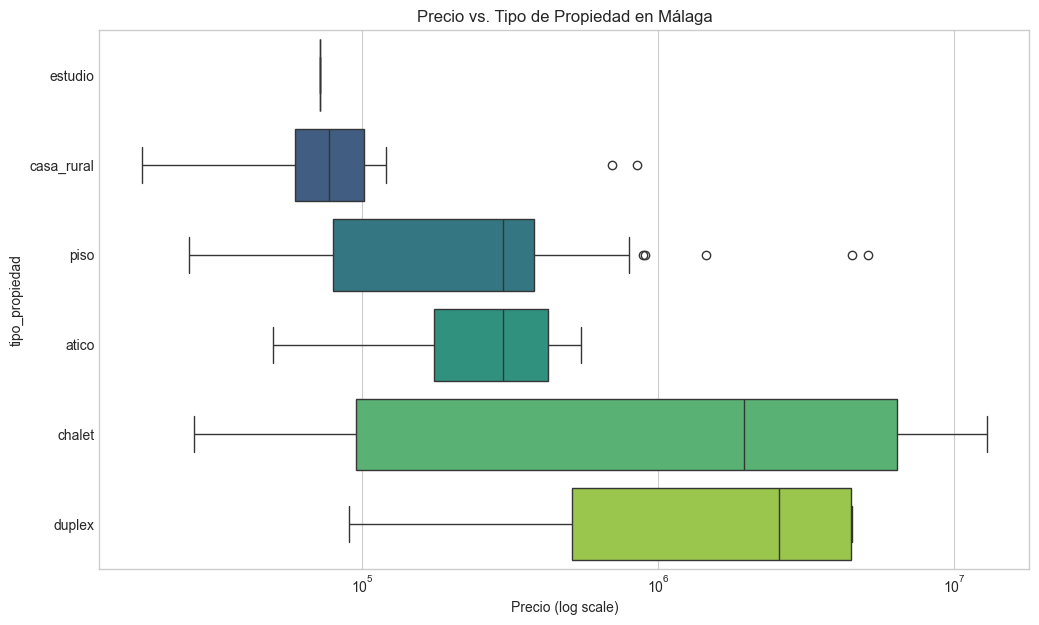

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\2023569968.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_malaga, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


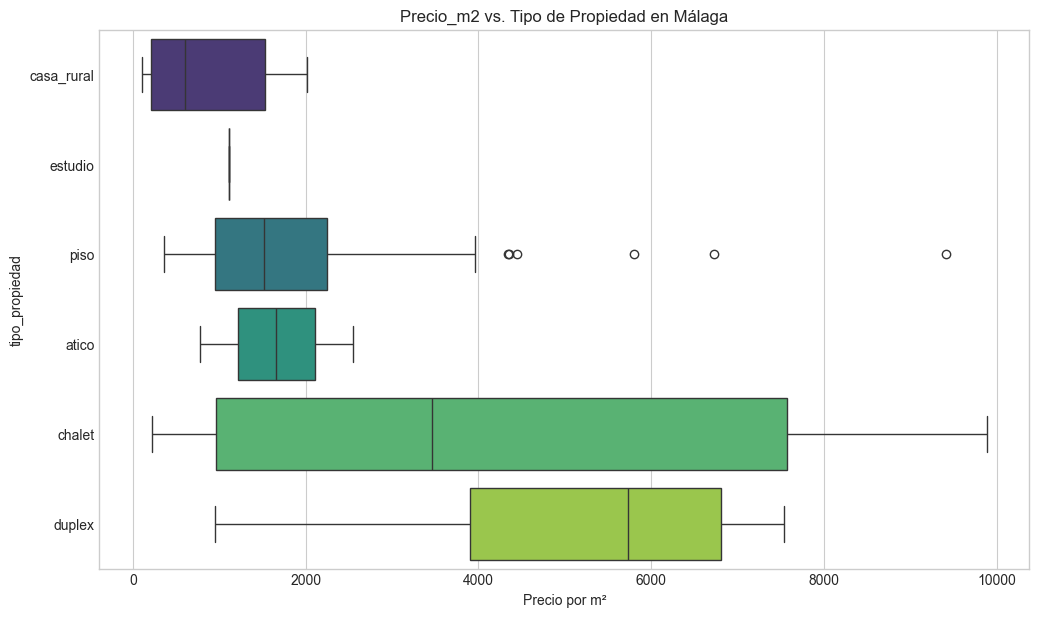

In [47]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Málaga
if not df_malaga.empty and 'tipo_propiedad' in df_malaga.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Málaga) ---")
    if 'precio' in df_malaga.columns and df_malaga['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_malaga.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_malaga, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Málaga')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")

    if 'precio_m2' in df_malaga.columns and df_malaga['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_malaga.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_malaga, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Málaga')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Málaga) ---


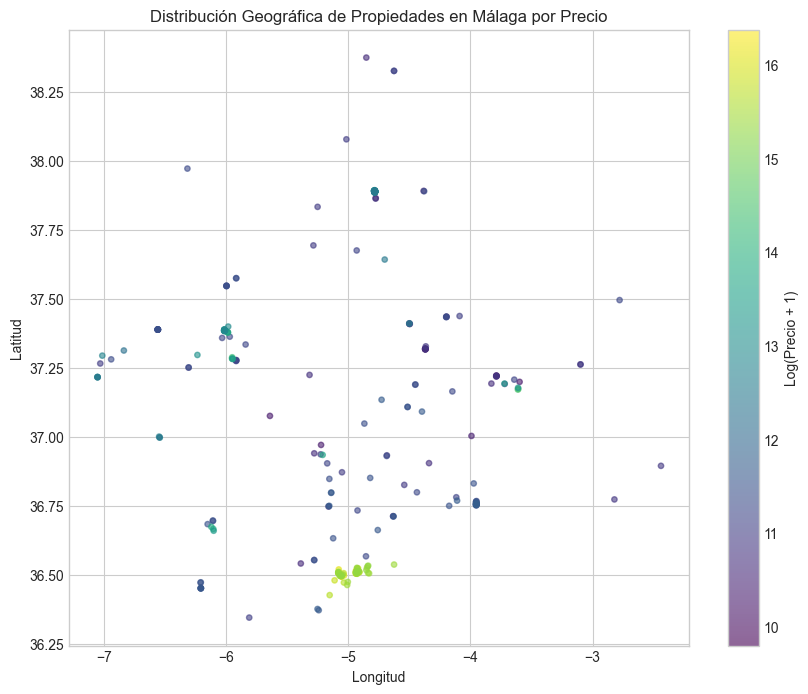

In [48]:
# Distribución Geoespacial de Propiedades en Málaga
if not df_malaga.empty and 'latitud' in df_malaga.columns and 'longitud' in df_malaga.columns:
    df_geo_malaga = df_malaga.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_malaga.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Málaga) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_malaga['longitud'], df_geo_malaga['latitud'], 
                              c=np.log1p(df_geo_malaga['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Málaga por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Málaga.")

\n--- 6. Densidad de Propiedades y Precios Medios (Málaga) ---


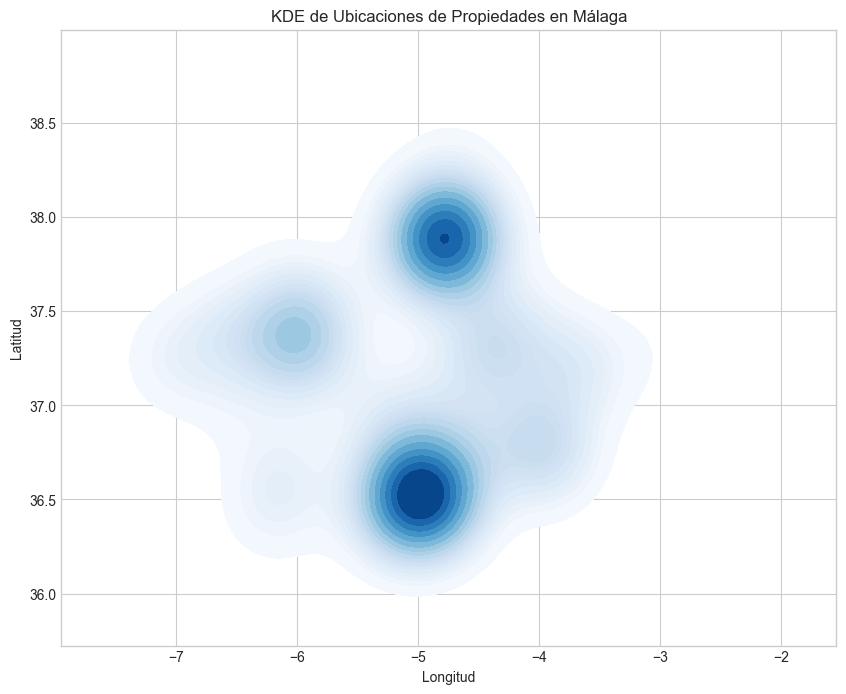

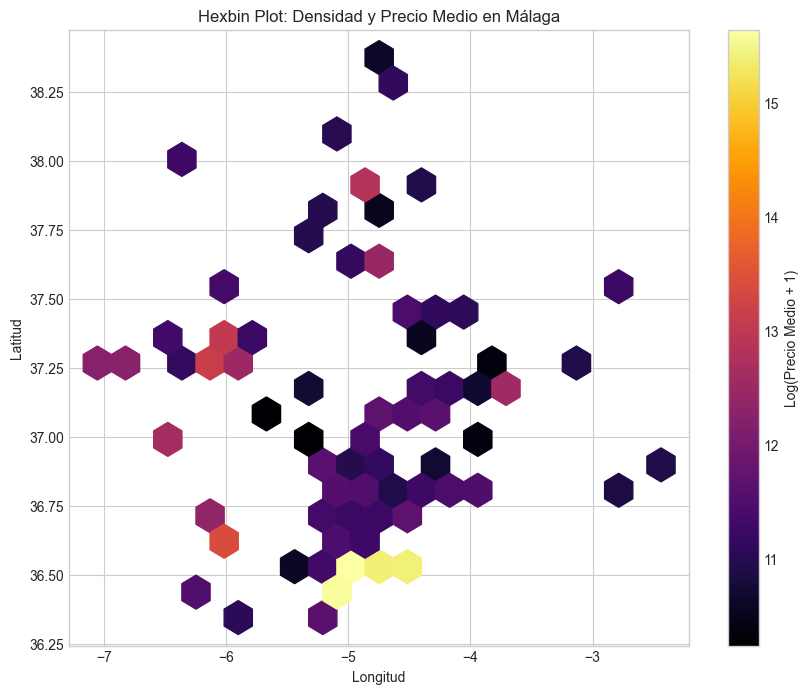

In [49]:
# Densidad de Propiedades y Precios Medios en Málaga
if not df_malaga.empty and 'latitud' in df_malaga.columns and 'longitud' in df_malaga.columns:
    df_geo_density_malaga = df_malaga.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_malaga.empty and len(df_geo_density_malaga) > 3:
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Málaga) ---")
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_malaga['longitud'], y=df_geo_density_malaga['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Málaga')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        df_hexbin_malaga = df_geo_density_malaga.dropna(subset=['precio'])
        if not df_hexbin_malaga.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_malaga['longitud'], df_hexbin_malaga['latitud'], C=np.log1p(df_hexbin_malaga['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Málaga')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Málaga después de filtrar NaNs.")
            
    elif not df_geo_density_malaga.empty and len(df_geo_density_malaga) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_malaga)}) para generar KDE/Hexbin en Málaga.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Málaga.")

## Análisis Específico para la Provincia de Sevilla

In [50]:
# Filtrar DataFrame y Estadísticas Descriptivas para Sevilla
if not df.empty and 'provincia' in df.columns:
    df_sevilla = df[df['provincia'] == 'Sevilla'].copy()
    if df_sevilla.empty:
        print(f"No hay datos disponibles para la provincia de Sevilla.")
    else:
        print(f"Análisis para la provincia de Sevilla")
        print(f"Número de propiedades en Sevilla: {len(df_sevilla)}")
        
        print("\\n--- 1. Estadísticas Descriptivas (Sevilla) ---")
        cols_to_describe = [col for col in numerical_cols_analysis if col in df_sevilla.columns]
        if cols_to_describe:
            display(df_sevilla[cols_to_describe].describe())
        else:
            print("No se encontraron columnas numéricas para estadísticas descriptivas en Sevilla.")
else:
    print("DataFrame principal vacío o columna 'provincia' no encontrada.")

Análisis para la provincia de Sevilla
Número de propiedades en Sevilla: 358
\n--- 1. Estadísticas Descriptivas (Sevilla) ---


precio  superficie  precio_m2  habitaciones  baños
count     358.00      358.00     358.00        358.00 358.00
mean   291305.52      240.70    1210.46          3.68   2.09
std    403142.79      281.97    1110.49          2.09   1.48
min     10500.00       25.00      85.53          0.00   0.00
25%     65000.00       85.00     586.72          3.00   1.00
50%     87000.00      135.00     875.02          3.00   2.00
75%    450000.00      263.00    1394.42          4.75   3.00
max   3200000.00     2500.00    9333.33         11.00   8.00

\n--- 2. Distribuciones de Variables Numéricas (Sevilla) ---


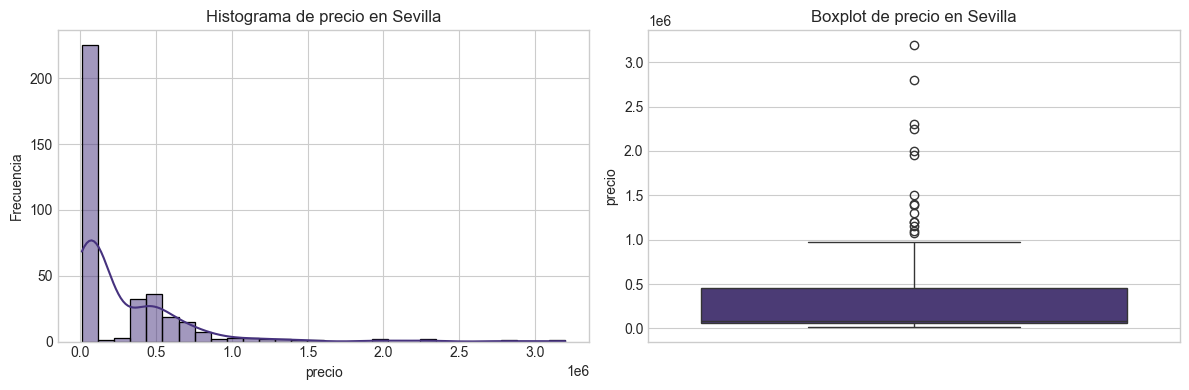

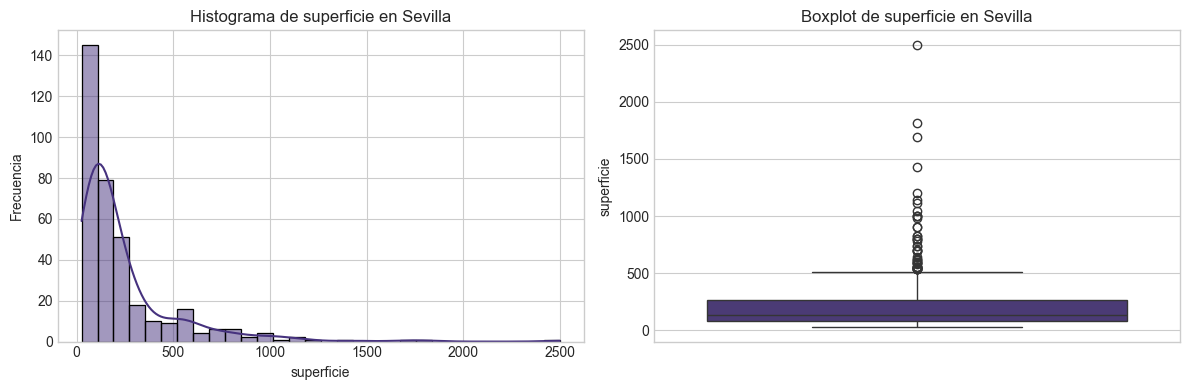

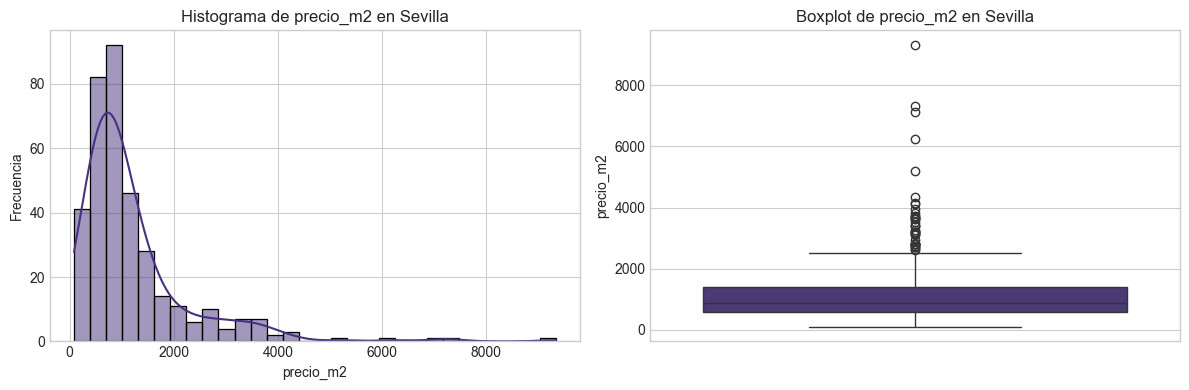

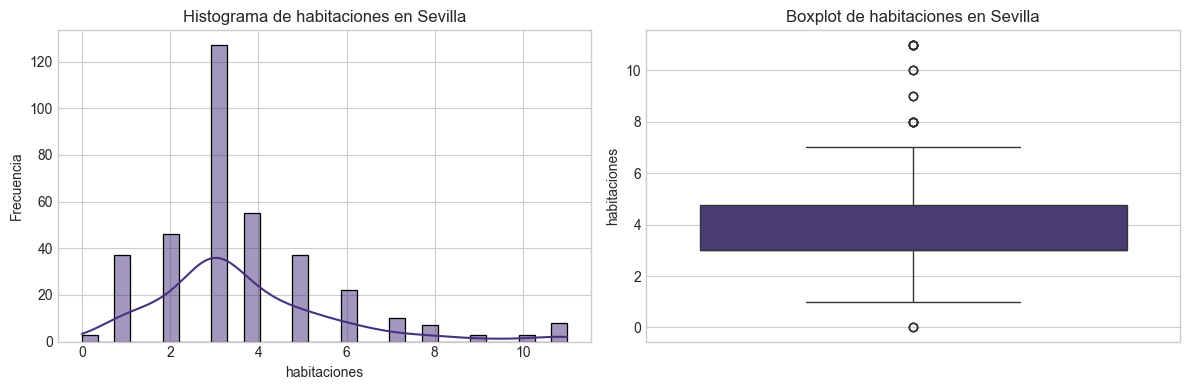

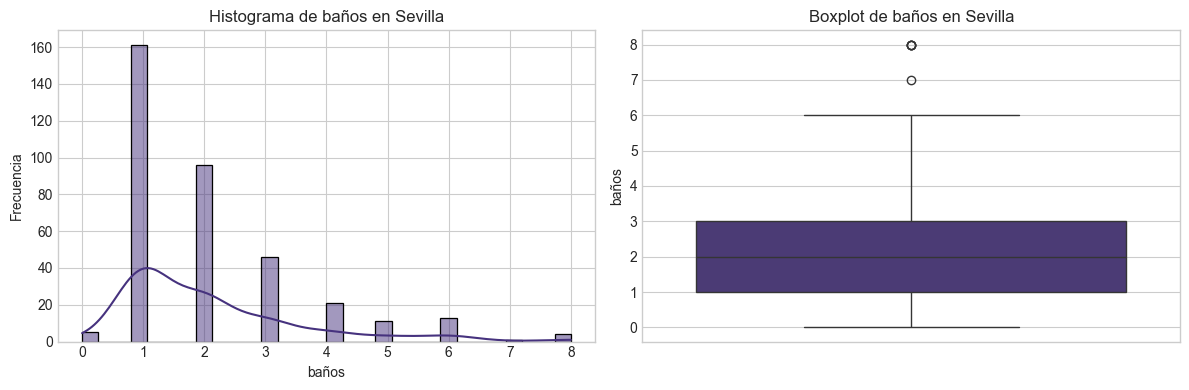

In [51]:
# Histogramas y Boxplots para Sevilla
if not df_sevilla.empty:
    print("\\n--- 2. Distribuciones de Variables Numéricas (Sevilla) ---")
    for col in cols_to_describe:
        if col in df_sevilla.columns and df_sevilla[col].notna().any():
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df_sevilla[col].dropna(), kde=True, bins=30)
            plt.title(f'Histograma de {col} en Sevilla')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_sevilla[col].dropna())
            plt.title(f'Boxplot de {col} en Sevilla')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"No hay datos suficientes o la columna {col} no existe para graficar en Sevilla.")

\n--- 3. Distribución de Tipo de Propiedad (Sevilla) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\40362567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sevilla, y='tipo_propiedad', order=df_sevilla['tipo_propiedad'].value_counts().index, palette='viridis')


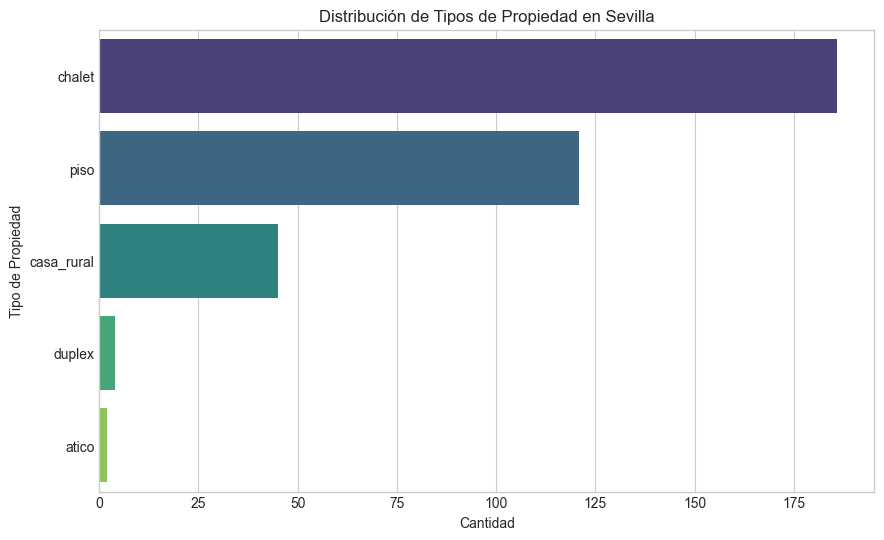

tipo_propiedad
chalet       51.96
piso         33.80
casa_rural   12.57
duplex        1.12
atico         0.56
Name: proportion, dtype: float64


In [52]:
# Distribución de Tipo de Propiedad en Sevilla
if not df_sevilla.empty and 'tipo_propiedad' in df_sevilla.columns:
    print("\\n--- 3. Distribución de Tipo de Propiedad (Sevilla) ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_sevilla, y='tipo_propiedad', order=df_sevilla['tipo_propiedad'].value_counts().index, palette='viridis')
    plt.title(f'Distribución de Tipos de Propiedad en Sevilla')
    plt.xlabel('Cantidad')
    plt.ylabel('Tipo de Propiedad')
    plt.show()
    print(df_sevilla['tipo_propiedad'].value_counts(normalize=True) * 100)

\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Sevilla) ---


C:\Users\danie\AppData\Local\Temp\ipykernel_14208\4181930458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sevilla, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


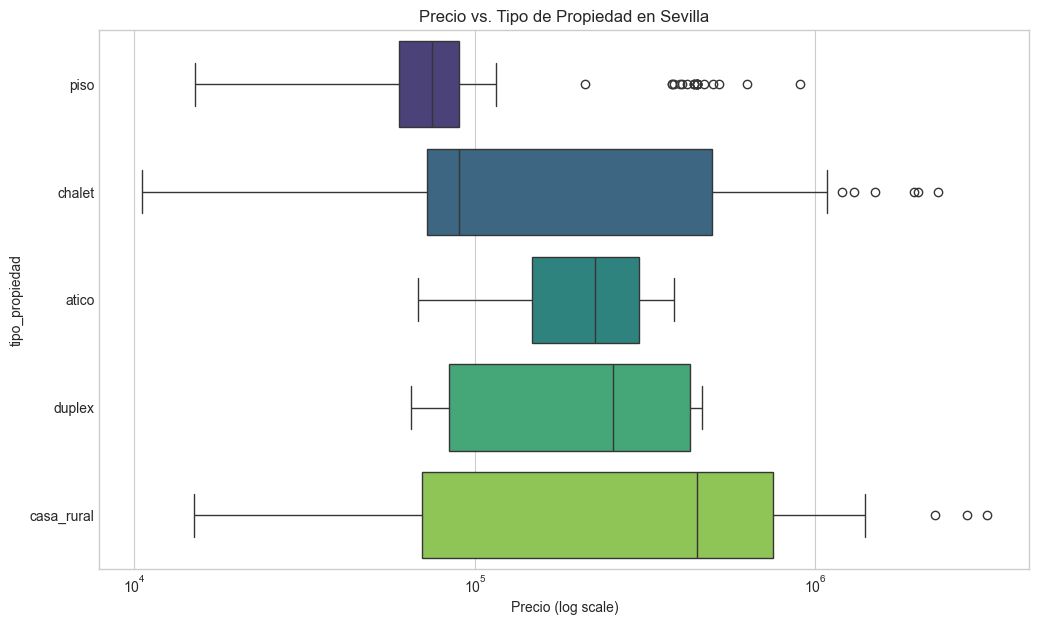

C:\Users\danie\AppData\Local\Temp\ipykernel_14208\4181930458.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sevilla, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


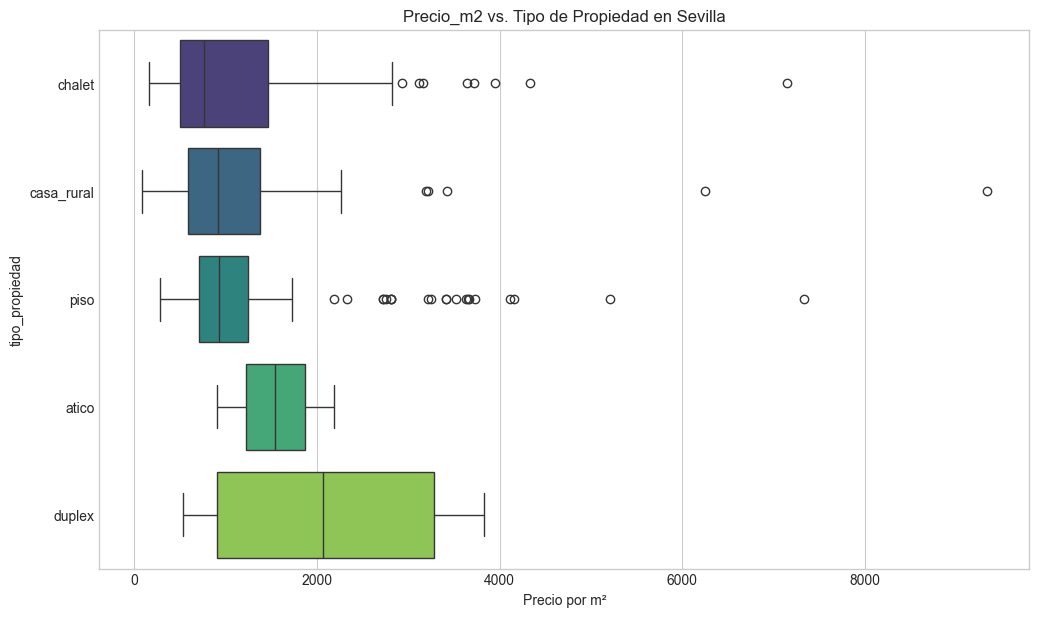

In [53]:
# Relación Tipo de Propiedad con Precio/Precio_m2 en Sevilla
if not df_sevilla.empty and 'tipo_propiedad' in df_sevilla.columns:
    print("\\n--- 4. Relación Tipo de Propiedad con Precio/Precio_m2 (Sevilla) ---")
    if 'precio' in df_sevilla.columns and df_sevilla['precio'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tp = df_sevilla.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df_sevilla, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title(f'Precio vs. Tipo de Propiedad en Sevilla')
            plt.xlabel('Precio (log scale)')
            plt.xscale('log')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio: {e}")

    if 'precio_m2' in df_sevilla.columns and df_sevilla['precio_m2'].notna().any():
        plt.figure(figsize=(12, 7))
        try:
            order_tpm2 = df_sevilla.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df_sevilla, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title(f'Precio_m2 vs. Tipo de Propiedad en Sevilla')
            plt.xlabel('Precio por m²')
            plt.show()
        except Exception as e:
            print(f"Error al generar boxplot de precio_m2: {e}")

\n--- 5. Distribución Geoespacial de Propiedades (Sevilla) ---


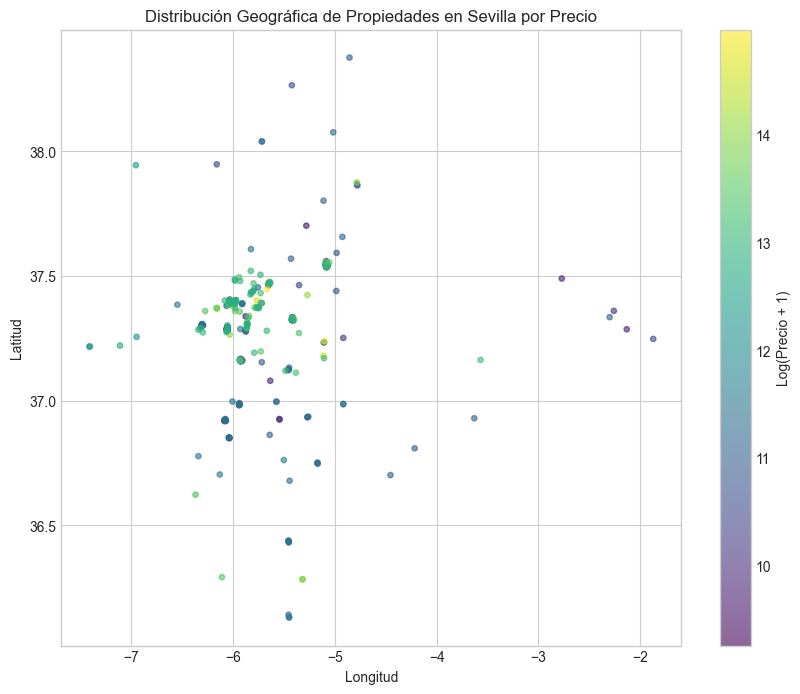

In [54]:
# Distribución Geoespacial de Propiedades en Sevilla
if not df_sevilla.empty and 'latitud' in df_sevilla.columns and 'longitud' in df_sevilla.columns:
    df_geo_sevilla = df_sevilla.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_sevilla.empty:
        print("\\n--- 5. Distribución Geoespacial de Propiedades (Sevilla) ---")
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo_sevilla['longitud'], df_geo_sevilla['latitud'], 
                              c=np.log1p(df_geo_sevilla['precio']), 
                              cmap='viridis', alpha=0.6, s=15)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title(f'Distribución Geográfica de Propiedades en Sevilla por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos geoespaciales (lat, lon, precio) para graficar en Sevilla.")

\n--- 6. Densidad de Propiedades y Precios Medios (Sevilla) ---


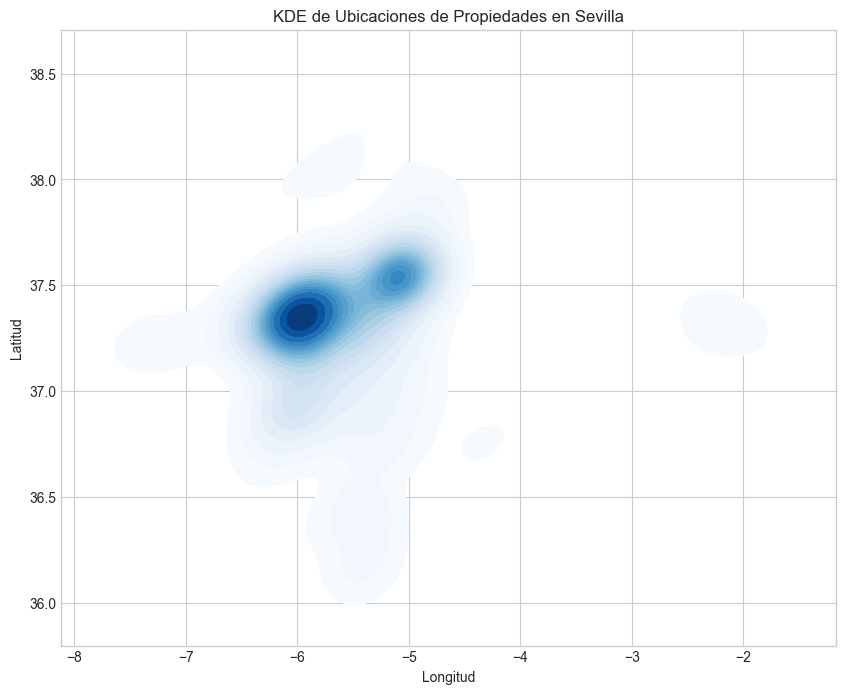

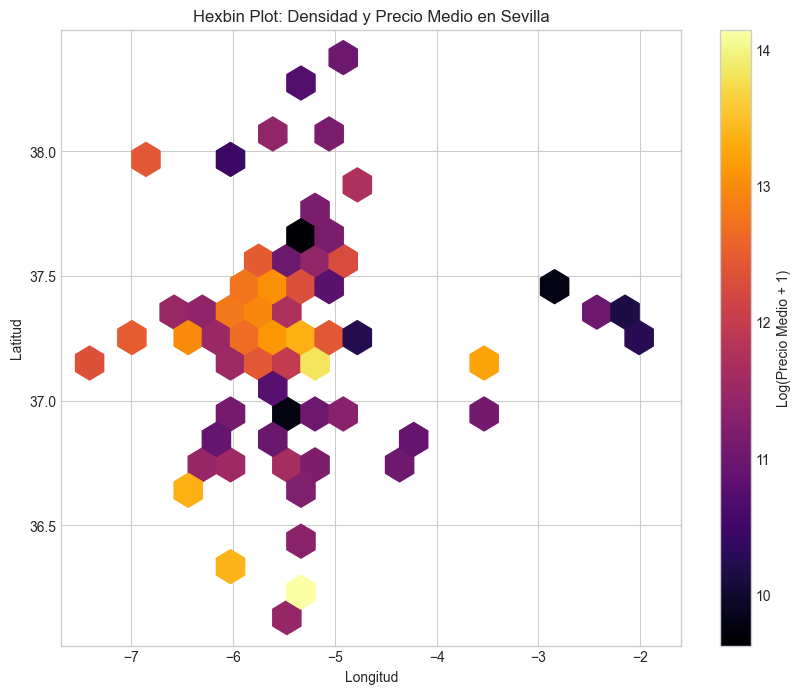

In [55]:
# Densidad de Propiedades y Precios Medios en Sevilla
if not df_sevilla.empty and 'latitud' in df_sevilla.columns and 'longitud' in df_sevilla.columns:
    df_geo_density_sevilla = df_sevilla.dropna(subset=['latitud', 'longitud', 'precio'])
    if not df_geo_density_sevilla.empty and len(df_geo_density_sevilla) > 3:
        print("\\n--- 6. Densidad de Propiedades y Precios Medios (Sevilla) ---")
        plt.figure(figsize=(10, 8))
        sns.kdeplot(x=df_geo_density_sevilla['longitud'], y=df_geo_density_sevilla['latitud'], cmap="Blues", fill=True, thresh=0.05, levels=20)
        plt.title(f'KDE de Ubicaciones de Propiedades en Sevilla')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        df_hexbin_sevilla = df_geo_density_sevilla.dropna(subset=['precio'])
        if not df_hexbin_sevilla.empty:
            plt.figure(figsize=(10, 8))
            hb = plt.hexbin(df_hexbin_sevilla['longitud'], df_hexbin_sevilla['latitud'], C=np.log1p(df_hexbin_sevilla['precio']), 
                            gridsize=20, cmap='inferno', reduce_C_function=np.mean, mincnt=1)
            cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
            plt.title(f'Hexbin Plot: Densidad y Precio Medio en Sevilla')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.grid(True)
            plt.show()
        else:
            print(f"No hay datos de precio para el Hexbin plot en Sevilla después de filtrar NaNs.")
            
    elif not df_geo_density_sevilla.empty and len(df_geo_density_sevilla) <=3:
        print(f"No hay suficientes puntos ({len(df_geo_density_sevilla)}) para generar KDE/Hexbin en Sevilla.")
    else:
        print(f"No hay suficientes datos geoespaciales para graficar densidad en Sevilla.")

## Conclusión del Análisis Detallado por Provincia

Este cuaderno ha proporcionado un análisis detallado y visualizaciones específicas para cada una de las 8 provincias de Andalucía. Se han examinado las estadísticas descriptivas, las distribuciones de variables numéricas clave, la composición de tipos de propiedad, su relación con los precios y la distribución geoespacial de las viviendas dentro de cada provincia.

**Observaciones Clave:**
-   Existen variaciones notables en las características del mercado inmobiliario (precios, tamaños, tipos de propiedad) entre las diferentes provincias.
-   La distribución geográfica de las propiedades y los precios dentro de cada provincia también muestra patrones locales específicos.
-   La calidad de la asignación de la provincia es fundamental. Las propiedades asignadas a 'Desconocida' no pudieron ser incluidas en estos análisis específicos, lo que podría sesgar algunas interpretaciones si este grupo es grande o sistemáticamente diferente.

Este análisis provincial detallado complementa el análisis general de Andalucía y puede ser crucial para entender las dinámicas locales que influyen en los precios de las viviendas, lo cual es valioso para la construcción de modelos predictivos más precisos y contextualizados.